### Importing packages

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV 

### Read the data

In [2]:
tourism_pkg=pd.read_excel(io='Tourism.xlsx',sheet_name='Tourism')

In [3]:
# copying the data 
data = tourism_pkg.copy()

### Get first and last 5 Rows

In [4]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


### Check the shape and datatypes in the data set

In [6]:
# check shape
data.shape

(4888, 20)

In [7]:
# check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

#####  Observation: 
- There are 4888 rows and 20 columns
- Thre are some null values in columns Age, TypeOfContact,Duration of pitch,NumberOfFollowUps, Preferred PropertyStar, NumberOfTrips, NumberOfChilderenVisiting, MonthlyIncome

### Data Cleanup

In [8]:
#Check null counts in each column
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [9]:
# check value counts
for col in data.columns:
    print('value counts for the column {}\n'.format(col),data[col].value_counts(dropna=False))
    print('\n \n')
    

value counts for the column CustomerID
 200702    1
201479    1
203514    1
201467    1
203518    1
         ..
204257    1
200163    1
202212    1
204261    1
204800    1
Name: CustomerID, Length: 4888, dtype: int64

 

value counts for the column ProdTaken
 0    3968
1     920
Name: ProdTaken, dtype: int64

 

value counts for the column Age
 35.0    237
36.0    231
NaN     226
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
60.0     29
57.0     29
18.0     14
61.0      9
Name: Age, dtype: int64

 

value counts for the column TypeofContact
 Self Enquiry       3444
Company Invited   

##### Observation :
- Gender column has values Male, Female & Fe Male. It would be better if we combine both Female & Fe Male.
- MaritalStatus column has Unmarried and Single. I feel both should be combined together.

In [10]:
# processing Gender and MaritalStatus columns.
data['Gender'] = data['Gender'].str.replace('Fe Male', 'Female')
data['MaritalStatus'] = data['MaritalStatus'].str.replace('Unmarried','Single')

In [11]:
print('value counts for MaritalStatus column\n',data.MaritalStatus.value_counts())
print('\nvalue counts for MaritalStatus column\n',data.Gender.value_counts())

value counts for MaritalStatus column
 Married     2340
Single      1598
Divorced     950
Name: MaritalStatus, dtype: int64

value counts for MaritalStatus column
 Male      2916
Female    1972
Name: Gender, dtype: int64


##### Replacing the missing values with mean for the columns 
- ['Age','DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome']

In [12]:
# replacing null with mean value
cols = ['Age','DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome']
for col in cols:
   data[col].fillna(float(round(data[col].mean())),inplace=True)


In [13]:
data.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

##### 
- All the null values are replaced with Mean value of the column except Type of the contact. 
- Null values for TypeofContact  column will be replaced with Unknown at this moment.

In [14]:
# Replacing the Null values for Typeofcontact with Unknown
data['TypeofContact'].fillna('Unknown', inplace=True)
data.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

- No Null Values. 

In [15]:
# Converting the data types 'Object' to category
data.select_dtypes(include=['object']).columns
for col in data.select_dtypes(include=['object']).columns:
    data[col]=data[col].astype('category')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4888 non-null   float64 
 3   TypeofContact             4888 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4888 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4888 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4888 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4888 non-null   float6

### Summary of the data set

In [17]:
# check highlevel description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4888.0,37.639730,9.098764,18.0,31.00,37.0,43.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4888.0,15.465630,8.298678,5.0,9.00,14.0,19.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.583265,0.796466,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


##### Observation: 
- Average pitch satisfaction score is ~3.
- maximum duration of the pitch value is 127 which seems like an out lier.
- 75% of the customers are from Tier 3.
- 75% of the customers have 4 followups.
- Number of trips has a maximum value as 22 . Which migh need outlier treatment.
- Average income of the customers is ~23K. Minimum income is 1000 which is very low. 

### EDA

### Univariate Analysis

In [18]:
# common functions for Bar plots / box plot / histogram

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.15 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x=feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    
def treat_outliers(df,col):
    '''
    treats outliers in a variable
    col: str, name of the numerical variable
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=(Q3-Q1)
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df



#### Observations on Age

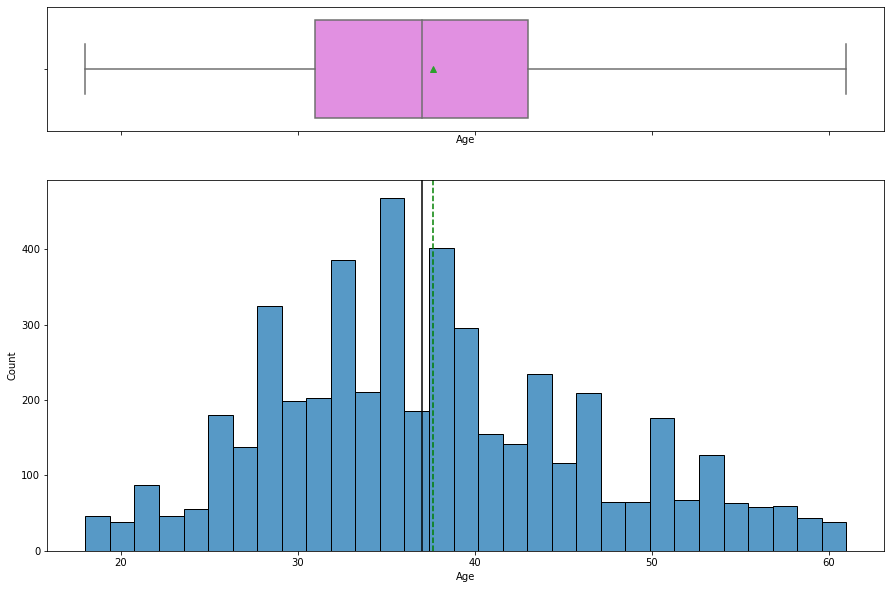

In [19]:
histogram_boxplot(data.Age)

##### 
- Age distribution is almost symmetric. Mean and meadian is approximately 38.

#### Observations on ProdTaken

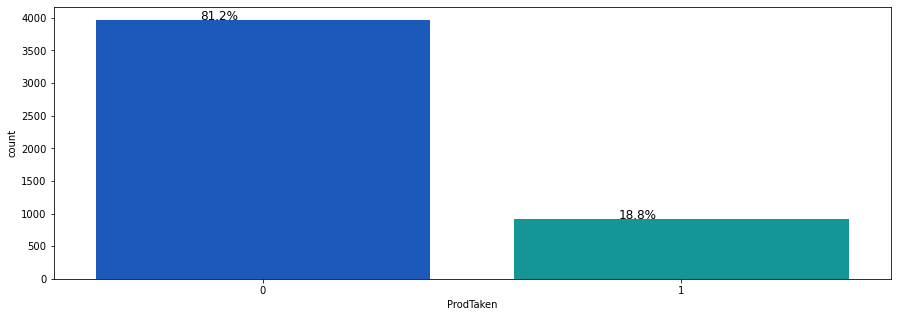

In [20]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data.ProdTaken,palette='winter')
perc_on_bar(ax, data.ProdTaken)

- Around 18% customers has purchased the product previously.

#### Observation on CityTier

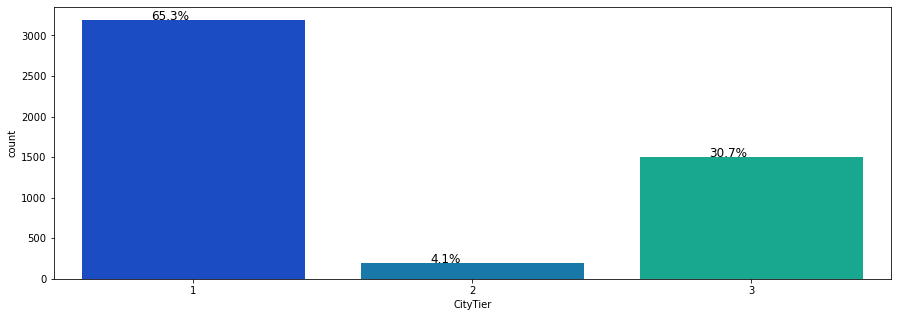

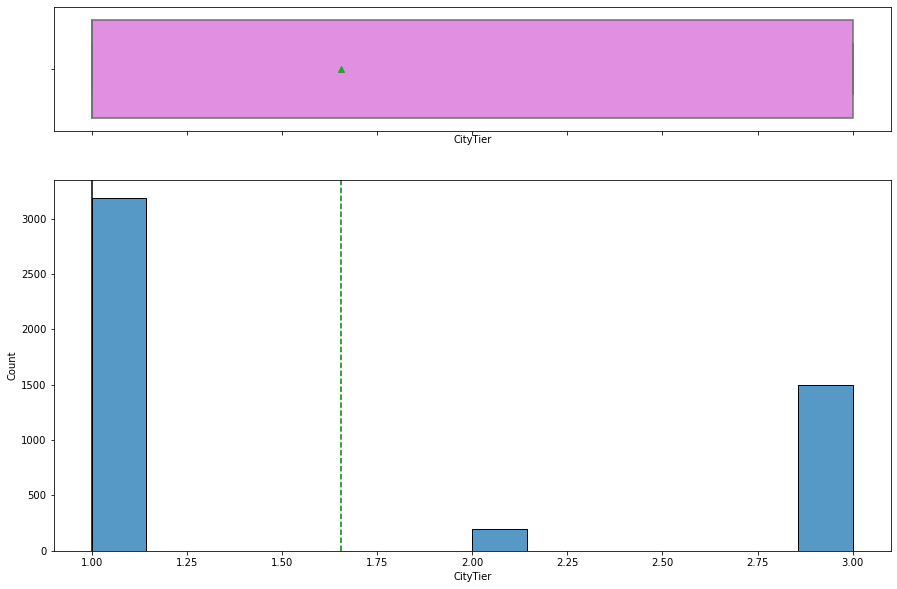

In [21]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data.CityTier,palette='winter')
perc_on_bar(ax, data.CityTier)
histogram_boxplot(data.CityTier)

- Tier 1 customers are more around 3500 compared to other tier cities

#### Observation on NumberOfPersonVisiting

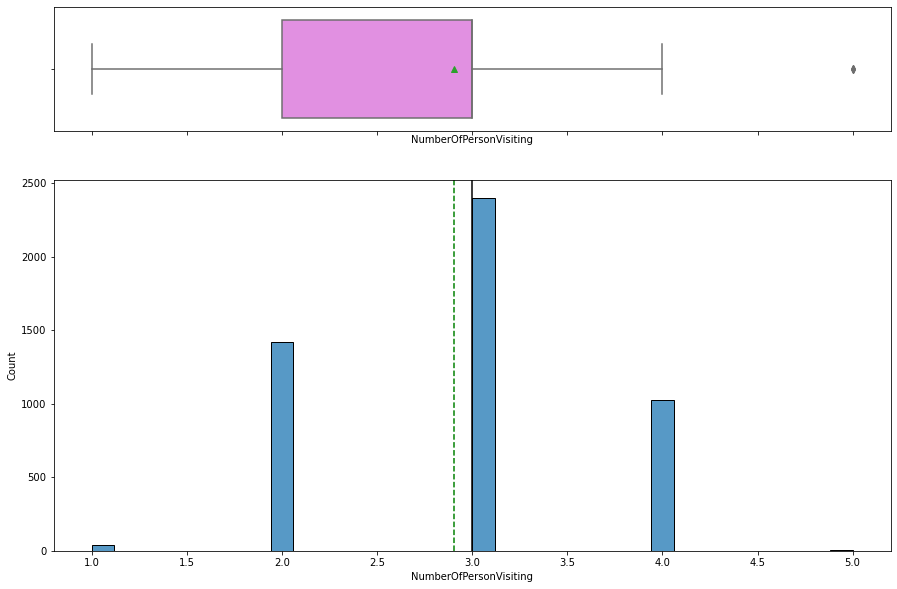

In [22]:
# plt.figure(figsize=(15,5))
# ax = sns.countplot(data.NumberOfPersonVisiting,palette='winter')
# perc_on_bar(ax, data.NumberOfPersonVisiting)
histogram_boxplot(data.NumberOfPersonVisiting)

- Mostly 3 people are visiting along with customers which is ~2400

#### Observation on NumberOfFollowups

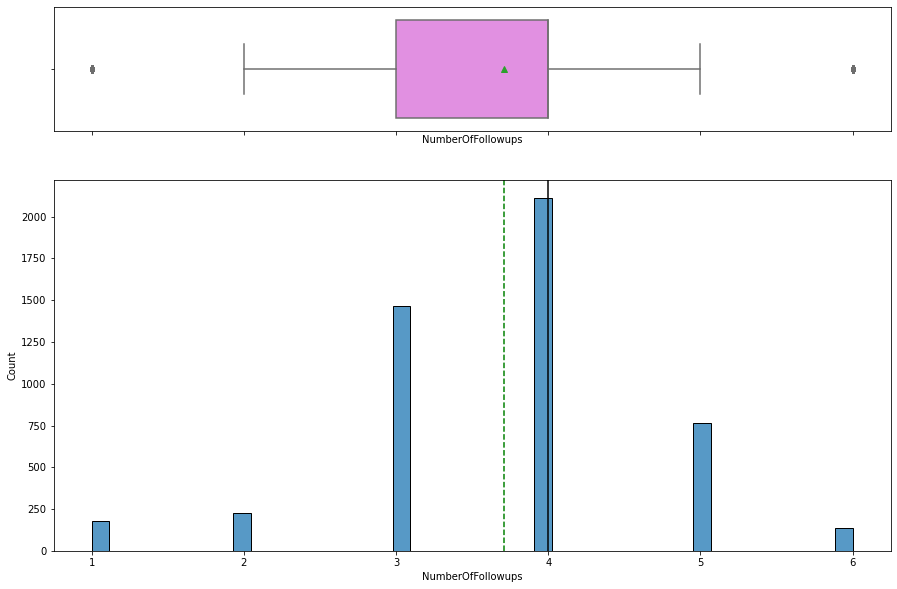

In [23]:
# plt.figure(figsize=(15,5))
# ax = sns.countplot(data.NumberOfFollowups,palette='winter')
# perc_on_bar(ax, data.NumberOfFollowups)
histogram_boxplot(data.NumberOfFollowups)

- Majarity of the customers are having ~4 follow-ups

#### Observation on PreferredPropertyStar

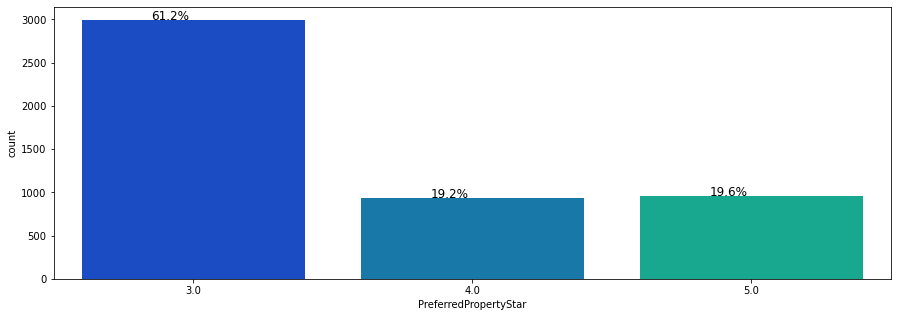

In [24]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data.PreferredPropertyStar,palette='winter')
perc_on_bar(ax, data.PreferredPropertyStar)

- ~61% of the customers gave 3 star property rating

#### Observation on NumberOfTrips

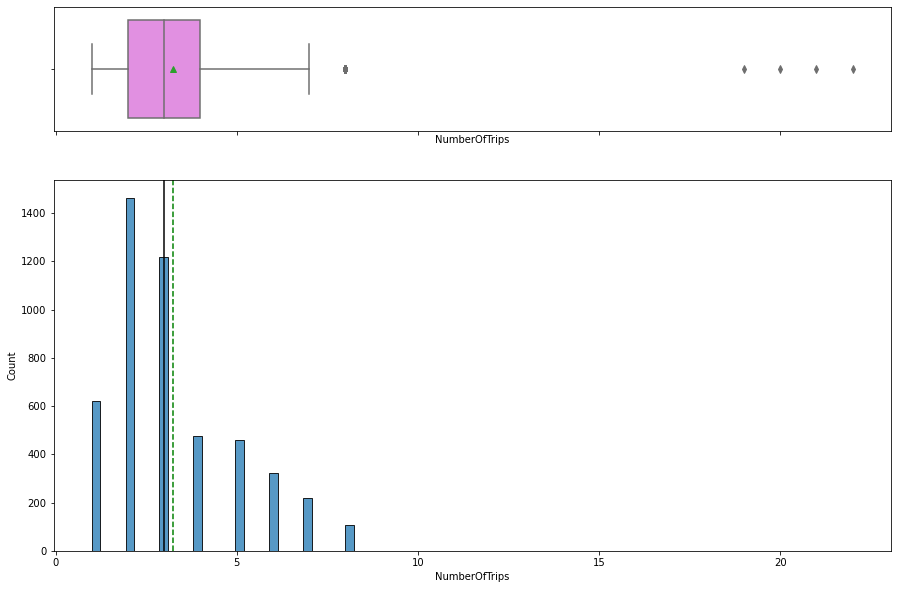

In [25]:
histogram_boxplot(data.NumberOfTrips)

- NumberOfTrips is little right skewed and there some outliers. we need out lier treatment for this.
- on an average 3 trips by the customers in a year.

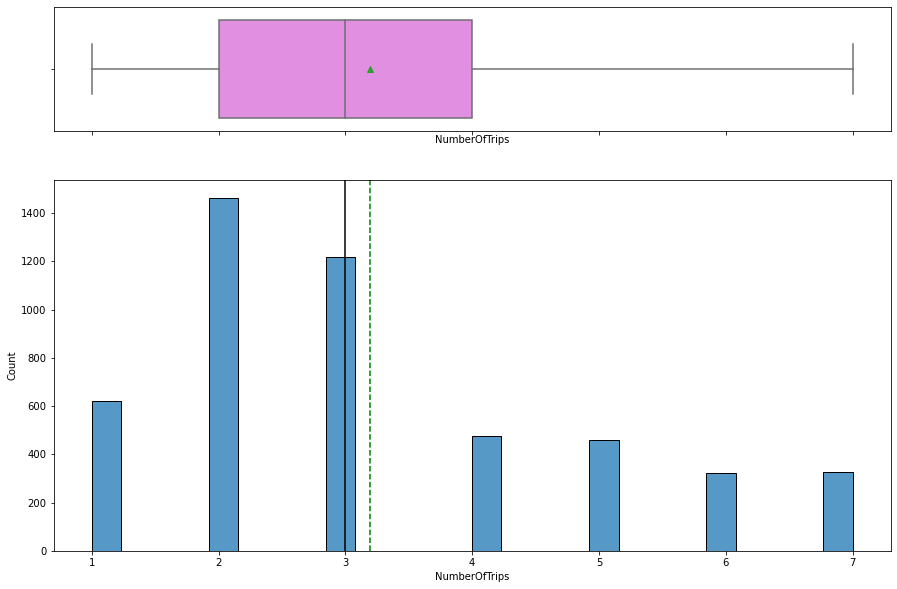

In [26]:
# out lier treatment for NumberOfTrips
data = treat_outliers(data, 'NumberOfTrips')
histogram_boxplot(data.NumberOfTrips)

- outliers are treated for NumberOfTrips

#### Observation on Passport

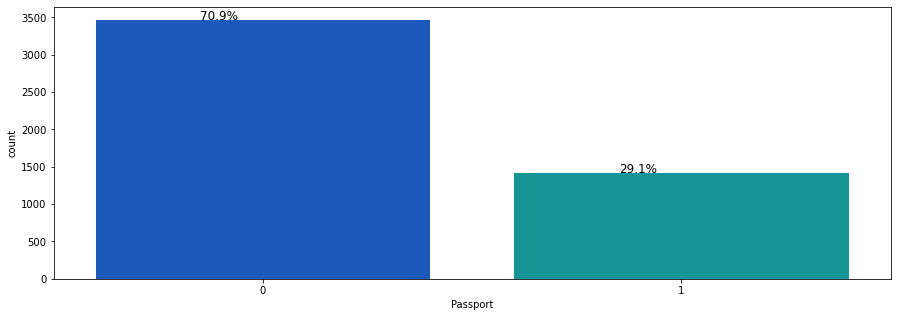

In [27]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data.Passport,palette='winter')
perc_on_bar(ax, data.Passport)

- ~70% doesnot have the passport

#### Observation on PitchSatisfactionScore

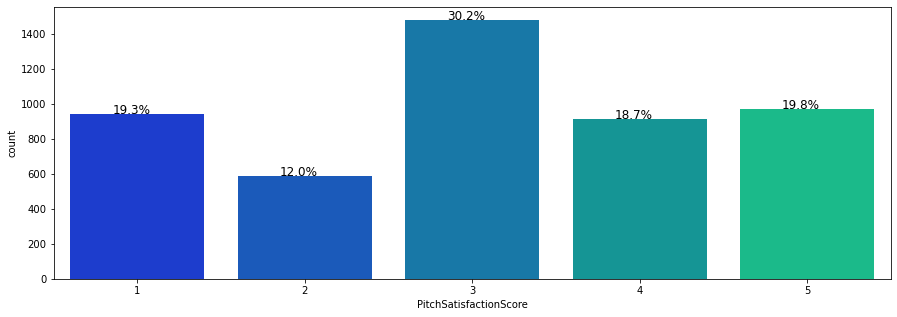

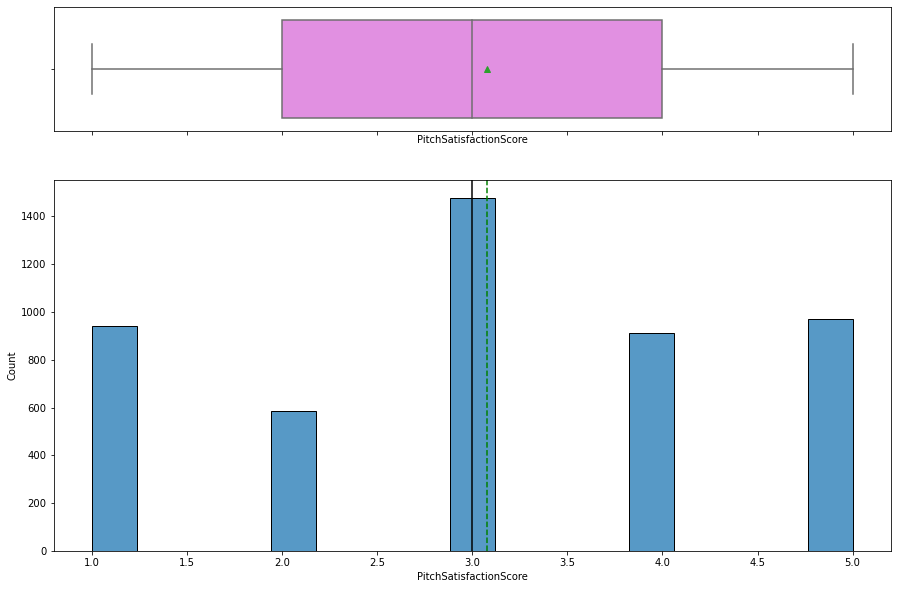

In [28]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data.PitchSatisfactionScore,palette='winter')
perc_on_bar(ax, data.PitchSatisfactionScore)
histogram_boxplot(data.PitchSatisfactionScore)

- On an average overal pitchsatisfaction score is 3.

#### Observation on OwnCar

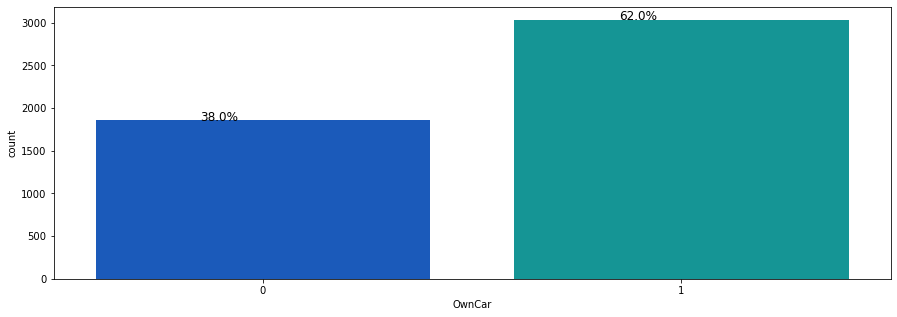

In [29]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data.OwnCar,palette='winter')
perc_on_bar(ax, data.OwnCar)

- 62% of the people are having owncar.

#### Observation on NumberOfChildrenVising

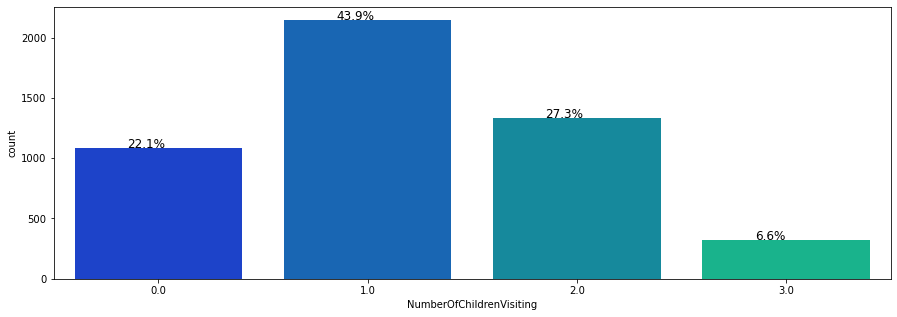

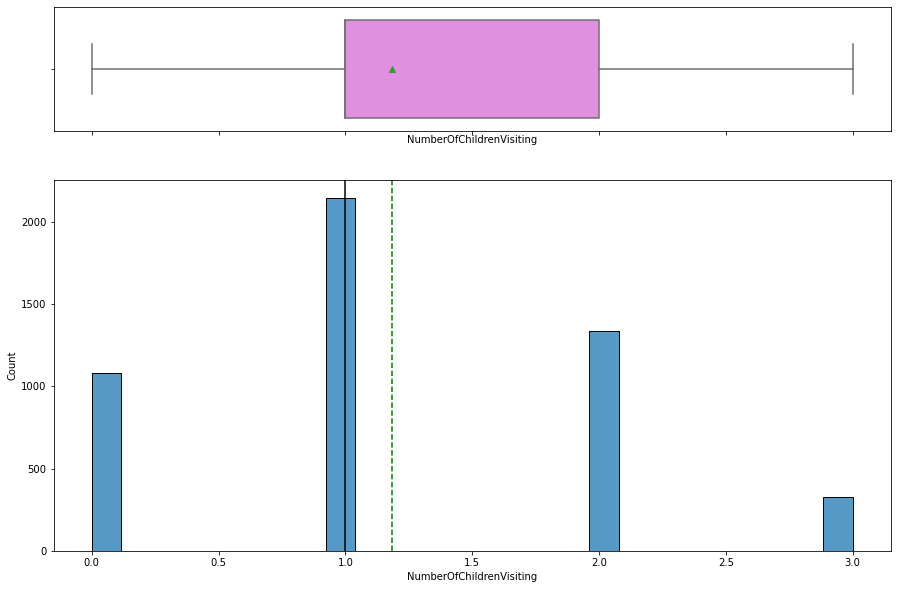

In [30]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data.NumberOfChildrenVisiting,palette='winter')
perc_on_bar(ax, data.NumberOfChildrenVisiting)
histogram_boxplot(data.NumberOfChildrenVisiting)

- Majority of the customers(43.9%) are having singlechild visting along with them.  

#### Observation on Monthly Income

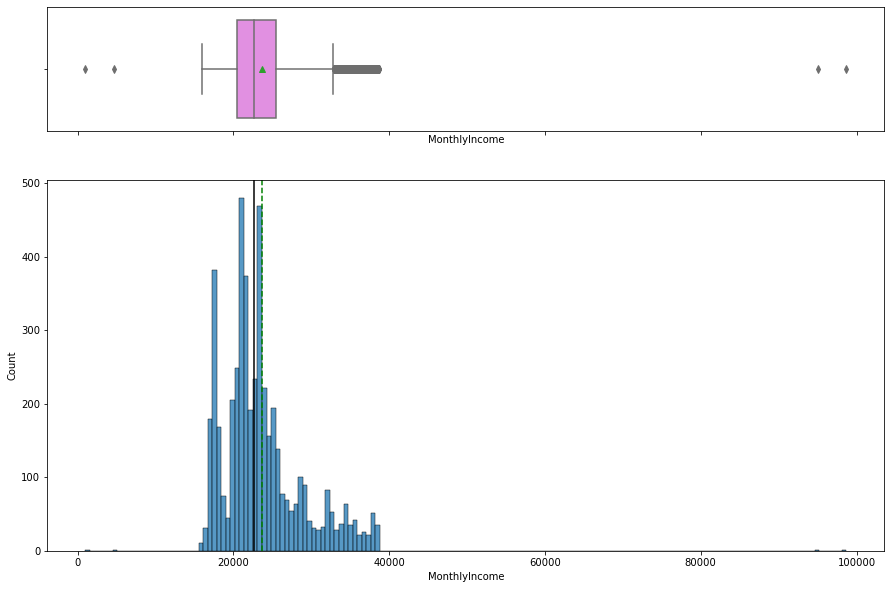

In [31]:
histogram_boxplot(data.MonthlyIncome)

- There are outliers in MonthlyIncome. Going to treat this for outlier. Average and median income are almost pretty close ~23K

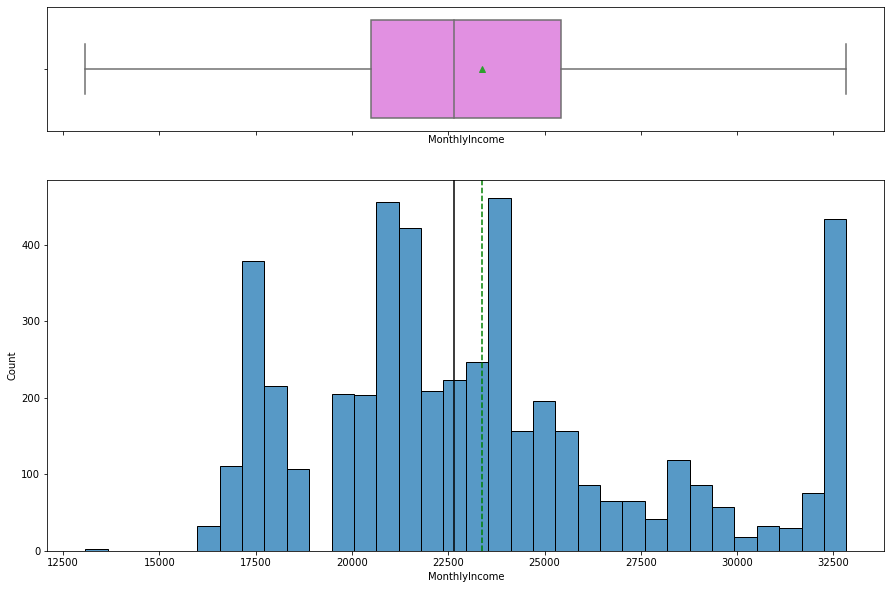

In [32]:
# treat outliers for MonthlyIncome
data = treat_outliers(data, 'MonthlyIncome')
histogram_boxplot(data.MonthlyIncome)

#### Observation on DurationOf the pitch

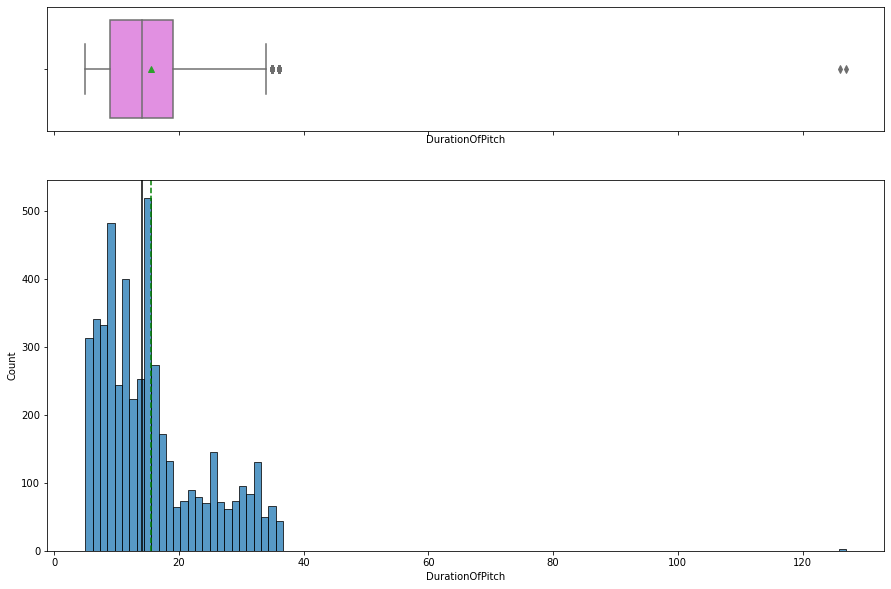

In [33]:
histogram_boxplot(data.DurationOfPitch)

- DurationofPitch has some outliers and little right skewed. Need to perform outlier treatment.

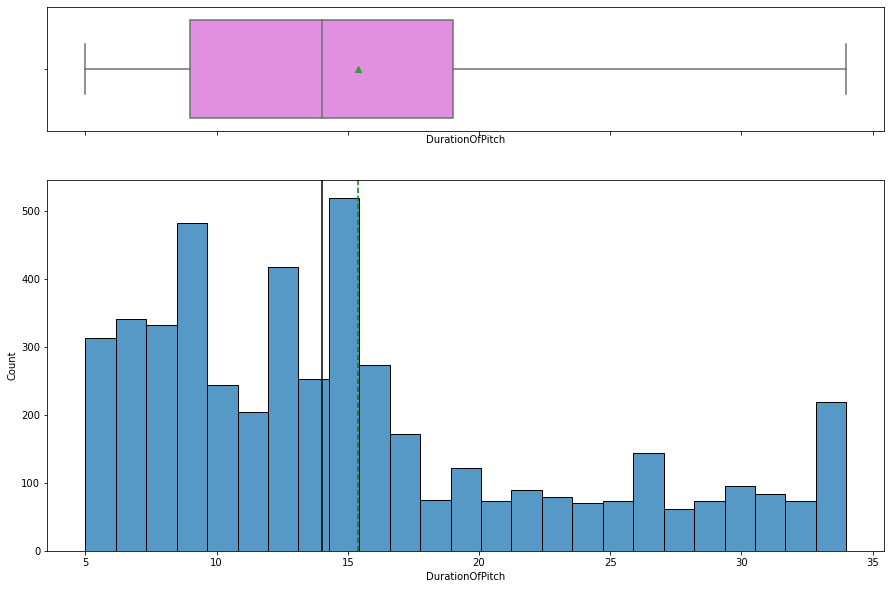

In [34]:
# outlier treatment for DurationOfPitch
data = treat_outliers(data, 'DurationOfPitch')
histogram_boxplot(data.DurationOfPitch)

- Average and median almost close to ~15

#### Observations on Catagorical features [TypeOfContact, Occupation, Gender, ProductPitched, Marital Status, Designation]

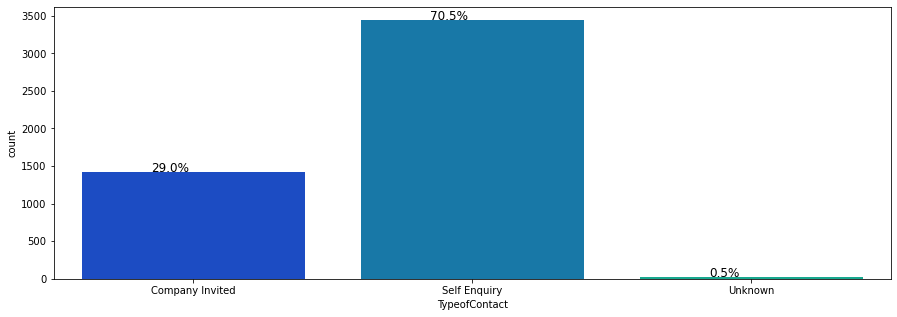

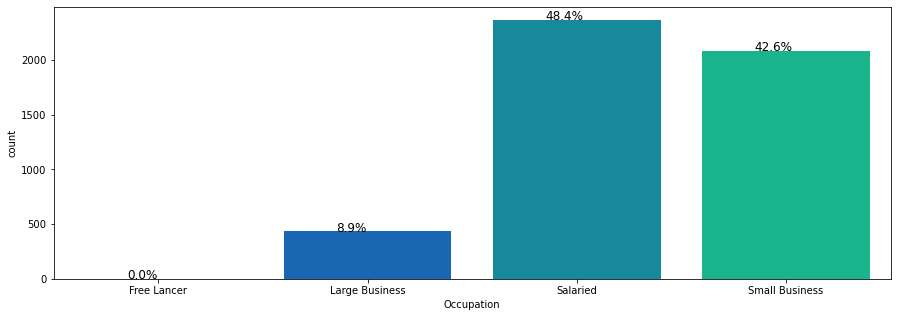

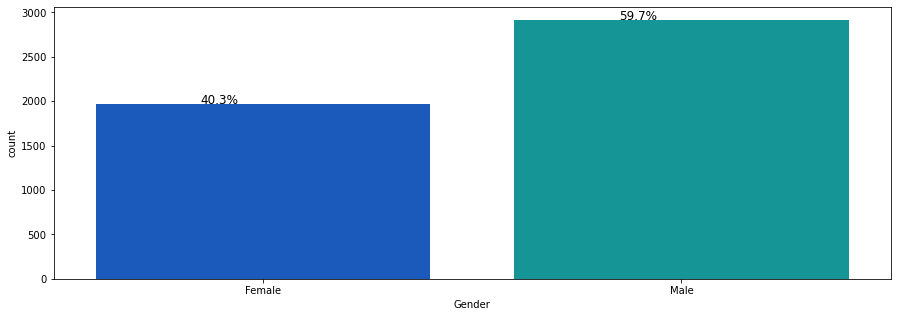

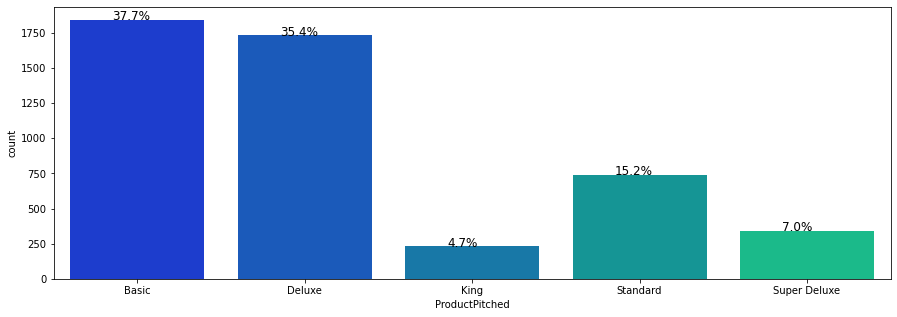

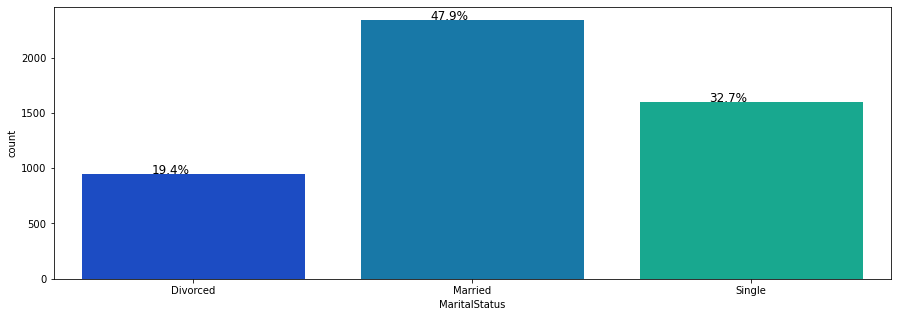

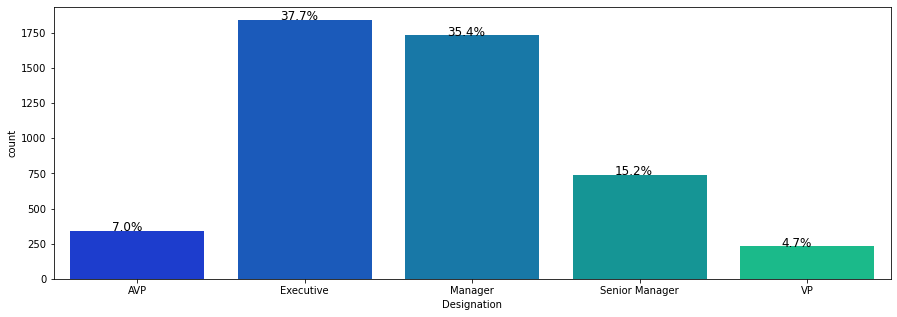

In [35]:
cols = data.select_dtypes(include='category').columns
for col in cols:
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[col],palette='winter')
    perc_on_bar(ax, data[col])

- Type of Contact -  Self Enquiry type almost 70%
- Occupation : Majority of the customers are Salaried and Small Business.
- Gender : Male customers are more than female.
- ProductPitched : Most of the products pitched are Basic and Delux.
- Marital Status : Most of the customers are Married & single
- Designation : Majority of the customers are either in Executive or Manager designations.

#### Bivariate analysis

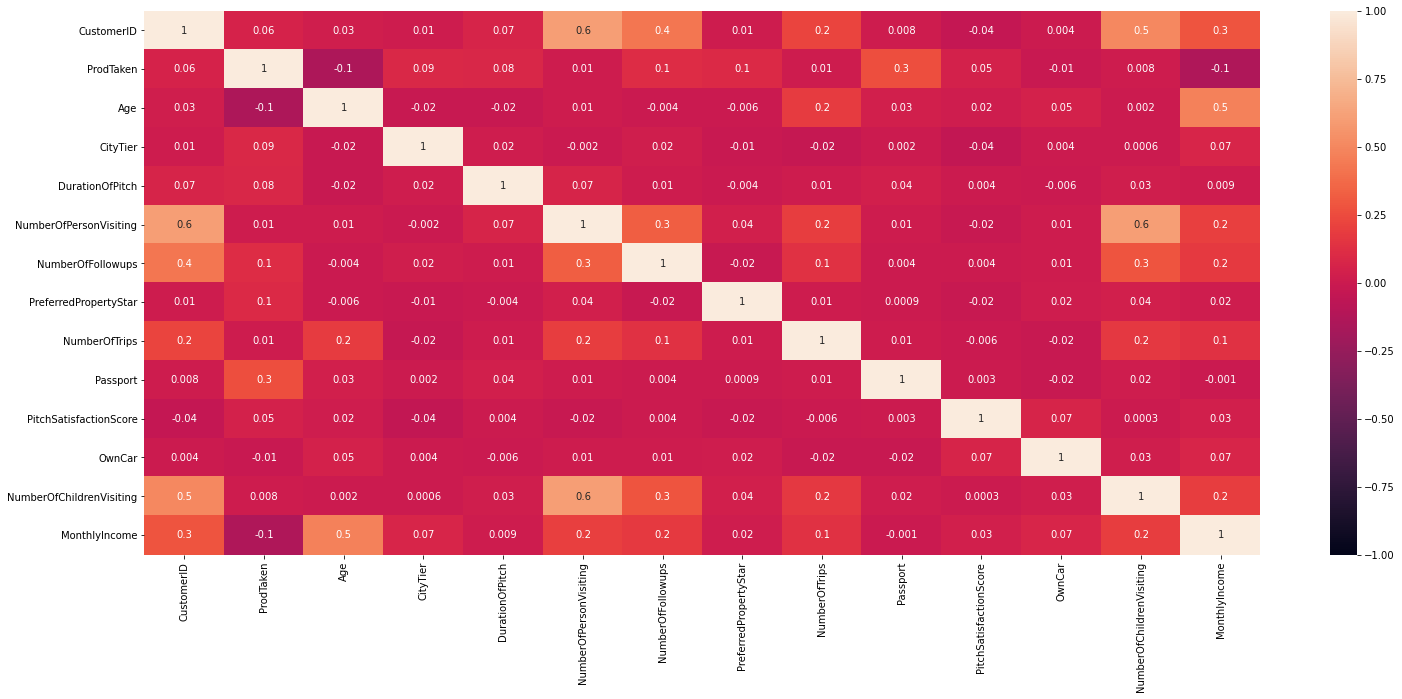

In [36]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g')
plt.show()

- Customer Id is not much helpful here. this column will be dropped.
- Monthly Income has moderate positive correlation with Age. Little less possitive correlation with columns NumberOfPersons Visiting, NumberOfFollowups, NumberOfTrips & NumberOfChilderenVisiting. And little negative correlation with ProdTaken
- NumberOfChildrenVisiting is having moderate Positive relationship with NumberOfPersonsVisiting. And little less than moderate positive correlation with Number of Followups & Number of trips
- ProdTaken has very little possitive correlation with NumberOfFollowups, PreferredPropertyStar.
- Age has little possitive correlation with NumberOfTrips.

In [37]:
# dropping customer id column.
data.drop('CustomerID', axis=1, inplace=True)

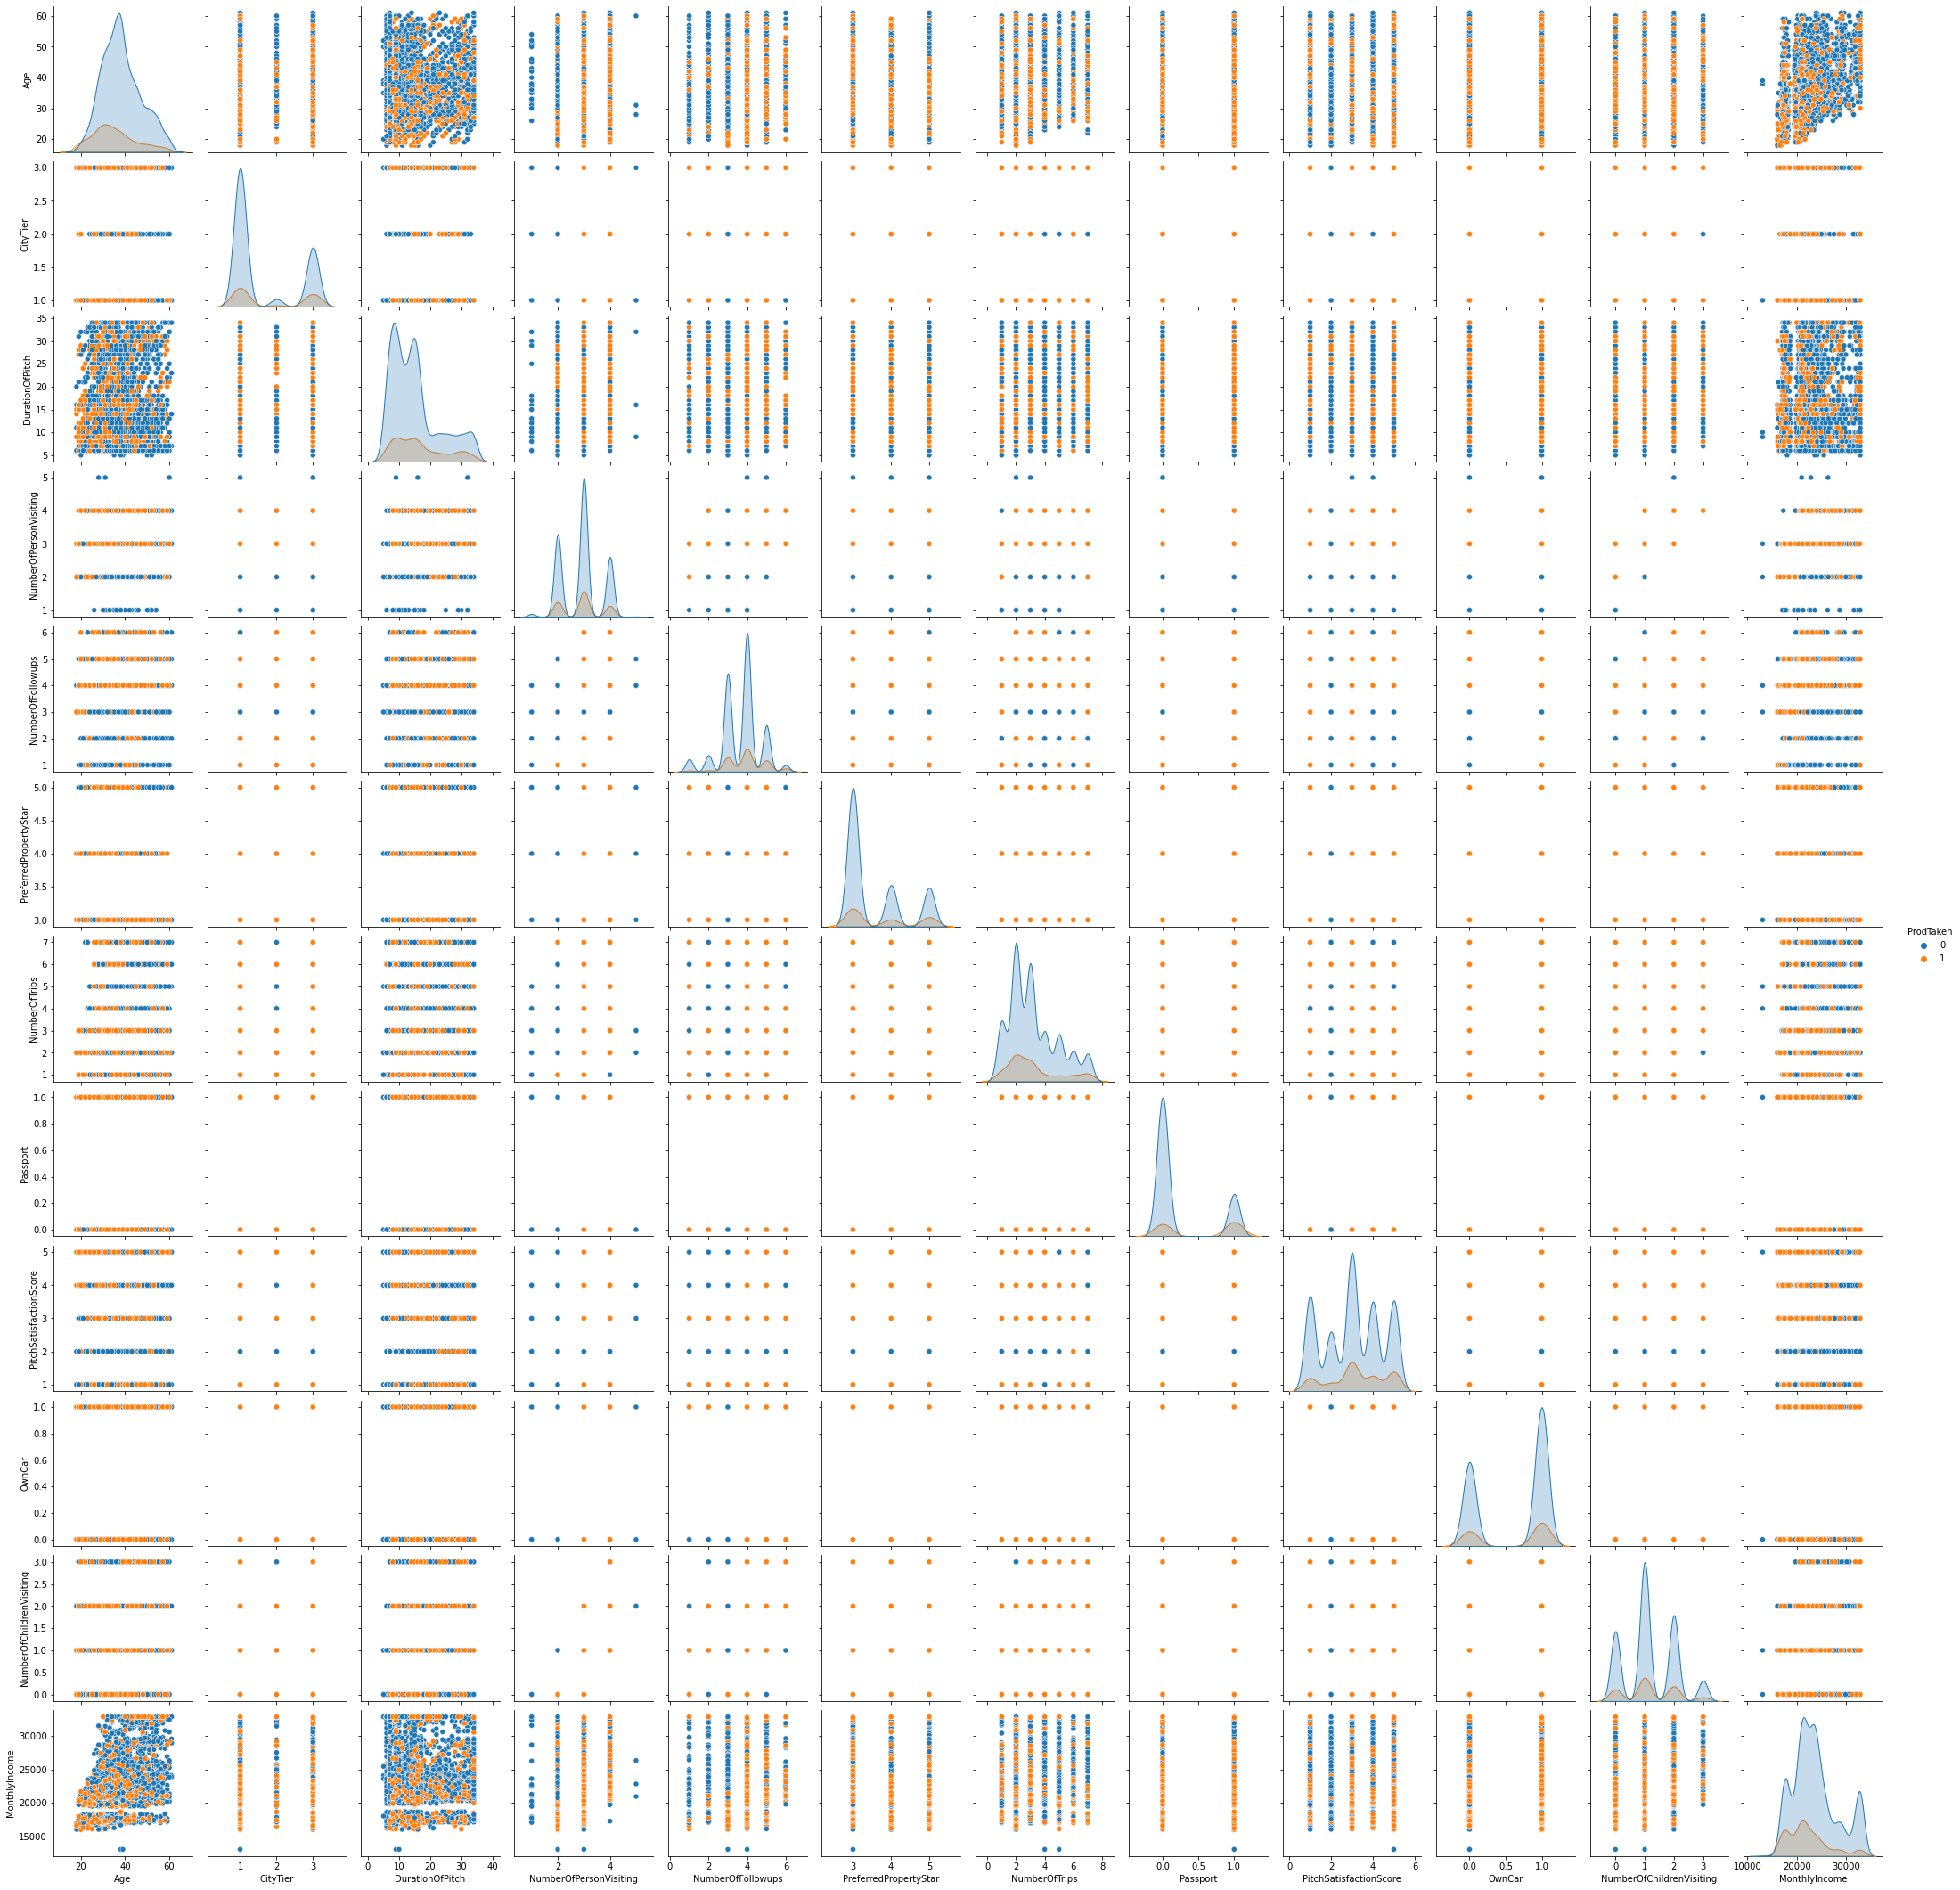

In [38]:
# draw pairplot
sns.pairplot(data,hue='ProdTaken')
plt.show()

- we can see that there is not much correlation between the features. Needed to do more analysis from different plots.

In [39]:
# Add new column ProdTaken_class(yes/ No)
data['ProdTaken_Class'] = data['ProdTaken'].apply(lambda x: 'Yes' if x==1 else 'No')

#### ProdTaken vs MonthlyIncome

<AxesSubplot:xlabel='ProdTaken_Class', ylabel='MonthlyIncome'>

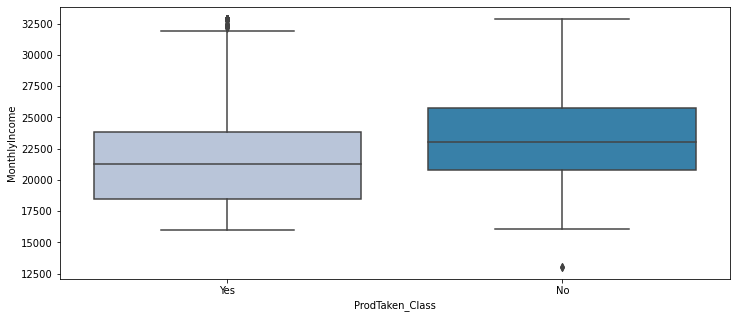

In [40]:
plt.figure(figsize=(12,5))
sns.boxplot(data['ProdTaken_Class'],data['MonthlyIncome'],palette="PuBu")

- Customers with higher income did not buy the package.

#### ProductToken vs NumberOfFollowups

<AxesSubplot:xlabel='ProdTaken_Class', ylabel='NumberOfFollowups'>

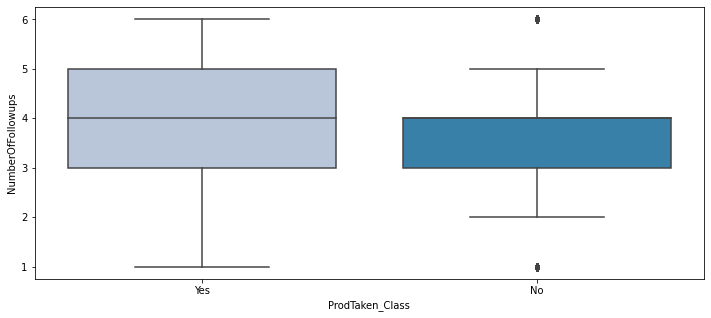

In [41]:
plt.figure(figsize=(12,5))
sns.boxplot(data['ProdTaken_Class'],data['NumberOfFollowups'],palette="PuBu")

- More number of followups increases the chances of taking the travel package.

#### ProdTaken vs prefferedPropertyStar

<AxesSubplot:xlabel='PreferredPropertyStar', ylabel='count'>

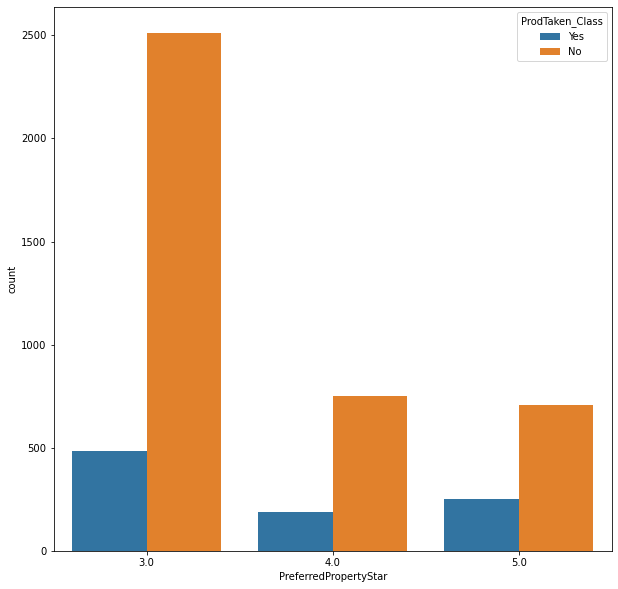

In [42]:
plt.figure(figsize=(10,10))
sns.countplot(data['PreferredPropertyStar'], hue = data['ProdTaken_Class'])

- Most of the customers who actually gave 3 star rating purchased the travel package.

#### ProductTaken Vs NumberofPersonsVisiting

<AxesSubplot:xlabel='NumberOfPersonVisiting', ylabel='count'>

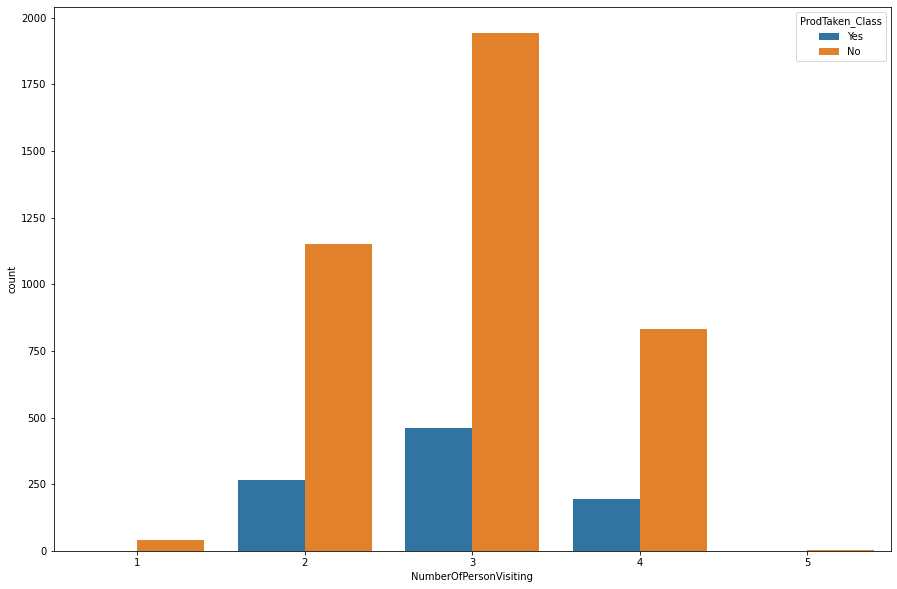

In [43]:
plt.figure(figsize=(15,10))
# sns.barplot(x='NumberOfPersonVisiting',y='MonthlyIncome', data=data, orient="v",hue='ProdTaken_Class' )
sns.countplot(data['NumberOfPersonVisiting'], hue = data['ProdTaken_Class'])

- Customers with Number of persons visiting (2 & 3 followed by 4)are more. And these customers had purchased the package mostly.

#### ProdTaken vs NumberOfChildrenVising

<AxesSubplot:xlabel='NumberOfChildrenVisiting', ylabel='count'>

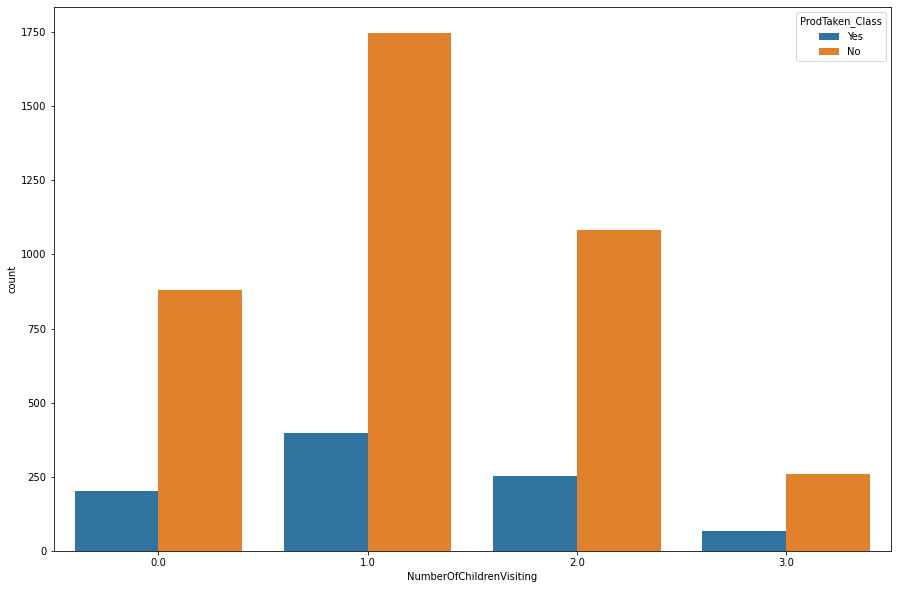

In [44]:
plt.figure(figsize=(15,10))
sns.countplot(data['NumberOfChildrenVisiting'], hue = data['ProdTaken_Class'])

- Customers with No children, single child & 2 children are more and these customers had shown interest to purchase the package.

#### ProdTaken Vs NumberOfTrips

<AxesSubplot:xlabel='NumberOfTrips', ylabel='count'>

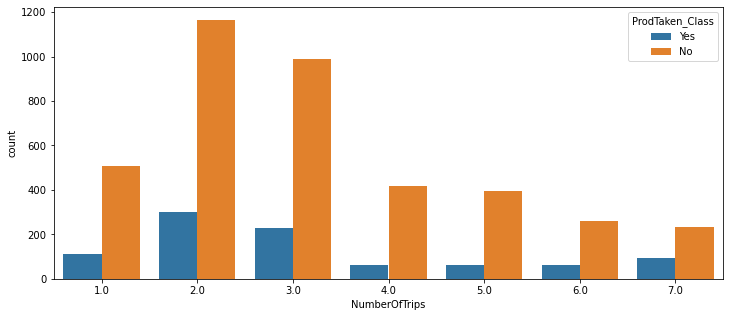

In [45]:
plt.figure(figsize=(12,5))
# sns.boxplot(data['ProdTaken_Class'],data['NumberOfTrips'],palette="PuBu")
sns.countplot(data['NumberOfTrips'], hue = data['ProdTaken_Class'])

- Customers with trips less than 3 in a year had purchased the plan mostly. 

#### TypeofContact vs ProdTaken

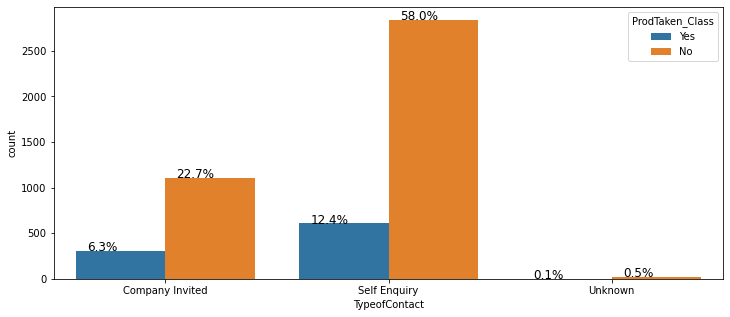

In [46]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data['TypeofContact'], hue = data['ProdTaken_Class'])
perc_on_bar(ax,data['TypeofContact'])

- Customers who did SelfEnquiry had purchased the package more than CompanyInvited type.

#### Occupation vs ProductTaken

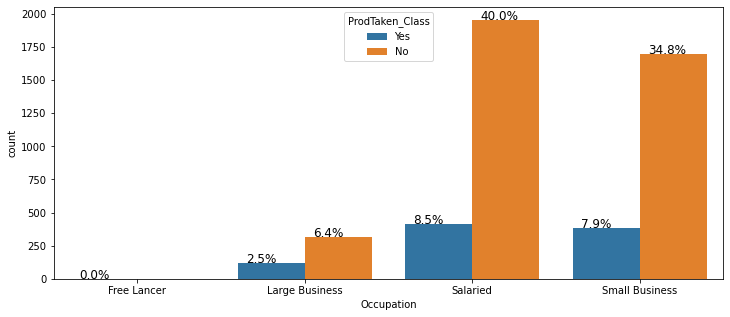

In [47]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data['Occupation'], hue = data['ProdTaken_Class'])
perc_on_bar(ax,data['Occupation'])

- Salaried and small business customers purchased the package more than large business customers.

#### ProductPitched vs ProductTaken

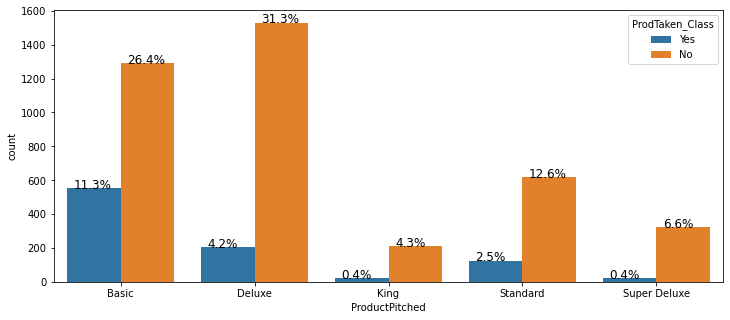

In [48]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data['ProductPitched'], hue = data['ProdTaken_Class'])
perc_on_bar(ax,data['ProductPitched'])

- Packages Basic, Deluxe & Standard were taken by the customers mostly. 
- King & superDeluxe packages were low on sales.

#### MaritalStatus vs ProdTaken

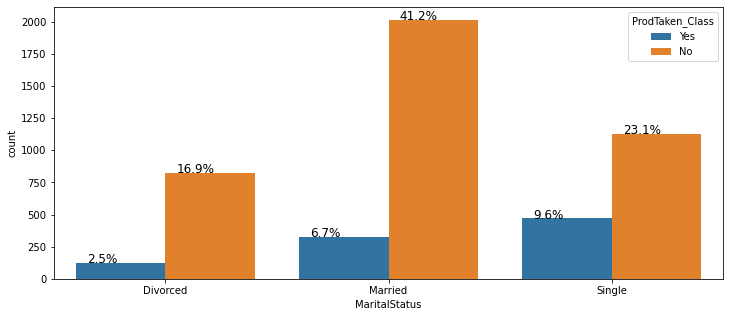

In [49]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data['MaritalStatus'], hue = data['ProdTaken_Class'])
perc_on_bar(ax,data['MaritalStatus'])

- Married and Single customers had taken the product more than Divorced.

#### Designation vs ProductTaken

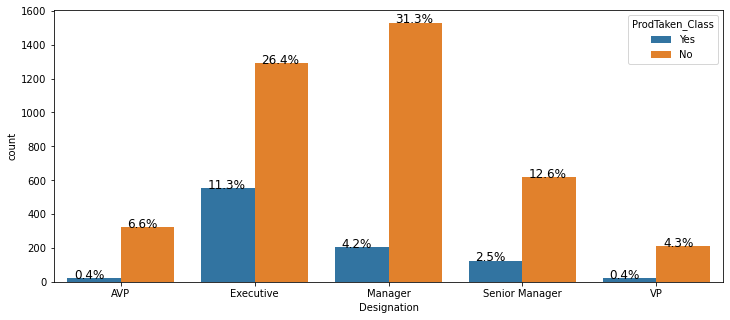

In [50]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data['Designation'], hue = data['ProdTaken_Class'])
perc_on_bar(ax,data['Designation'])

- Customers with designation Executive , Manager & senior Manger had purchased the product mostly compared to other designations like VP & AVP.

#### Gender Vs ProdTaken

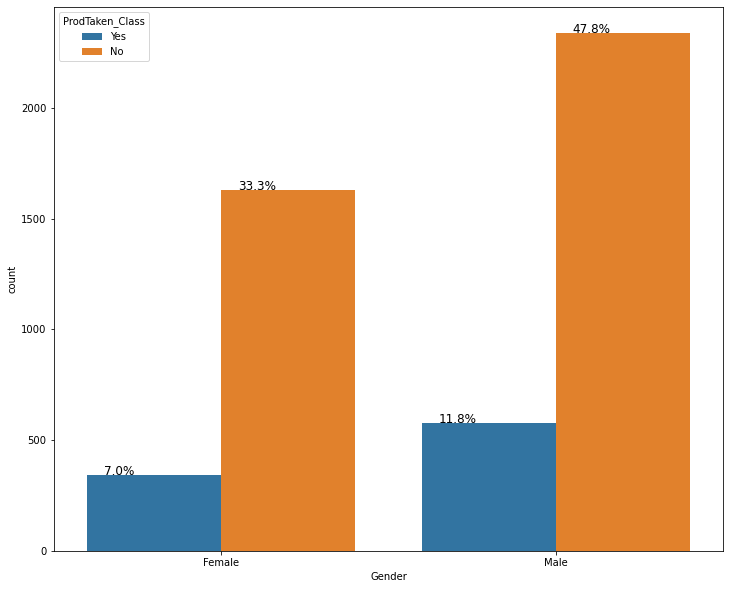

In [51]:
plt.figure(figsize=(12,10))
ax = sns.countplot(data['Gender'], hue = data['ProdTaken_Class'])
perc_on_bar(ax,data['Gender'])

- Male customers had purchased the product mostly compared to Female customers

#### Model Building

In [52]:
# drop the column ProdTaken since we have created new column ProdTaken_class
data.drop('ProdTaken_Class', axis=1,inplace=True)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   int64 

In [54]:
# converting few feature types from float to int
float_cols = ['NumberOfFollowups','PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting']
for col in float_cols:
    data[col]=data[col].astype(int)

##### get dummy variables.

In [55]:
dummy_cols =['CityTier','NumberOfPersonVisiting','Passport','PitchSatisfactionScore','OwnCar']
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist() + float_cols + dummy_cols,
        drop_first=True,
    )
    return x
Y = data['ProdTaken']
X = encode_cat_vars(data.drop(['ProdTaken'], axis=1))
X.head()

,Age,DurationOfPitch,MonthlyIncome,TypeofContact_Self Enquiry,TypeofContact_Unknown,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,ProductPitched_Deluxe,...,NumberOfPersonVisiting_2,NumberOfPersonVisiting_3,NumberOfPersonVisiting_4,NumberOfPersonVisiting_5,Passport_1,PitchSatisfactionScore_2,PitchSatisfactionScore_3,PitchSatisfactionScore_4,PitchSatisfactionScore_5,OwnCar_1
0,41.0,6.0,20993.0,1,0,0,1,0,0,1,...,0,1,0,0,1,1,0,0,0,1
1,49.0,14.0,20130.0,0,0,0,1,0,1,1,...,0,1,0,0,0,0,1,0,0,1
2,37.0,8.0,17090.0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
3,33.0,9.0,17909.0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,1
4,38.0,8.0,18468.0,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,1


#### Split data into Train and test set

In [56]:
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=0.3, random_state=1,stratify=Y)
print(X_train.shape, X_test.shape)

(3421, 47) (1467, 47)


#### Metrics Consideration: 

1. If the Model Predicts that the customer would take the package but actually he did not buy it - Loss of opportunity(False Positive).
2. If the Model predicts that the customer would not take the package but actually he takes the package - Loss of resources(False Negative). 

####  Which Metric is more important : 
- Company should focus more on False Negatives which causes more loss.

###### Company would want to maximize "recall" score to minimize the false negatives.

#### Common functions to get metrics score and Confusion metrics.

In [57]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [58]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Decision Tree classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.9052488070892979
Recall on training set :  1.0
Recall on test set :  0.7608695652173914
Precision on training set :  1.0
Precision on test set :  0.7420494699646644
F1-Score on training set :  1.0
F1-Score on test set :  0.7513416815742396


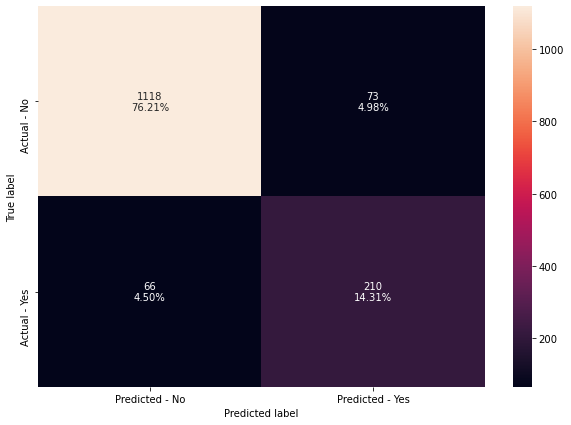

In [59]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

- Decision tree looks overfitting on training set. Need hyper tuning to improve the performance.

#### Visualizing the decision tree without hypertuning.

In [60]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'DurationOfPitch', 'MonthlyIncome', 'TypeofContact_Self Enquiry', 'TypeofContact_Unknown', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Male', 'ProductPitched_Deluxe', 'ProductPitched_King', 'ProductPitched_Standard', 'ProductPitched_Super Deluxe', 'MaritalStatus_Married', 'MaritalStatus_Single', 'Designation_Executive', 'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP', 'NumberOfFollowups_2', 'NumberOfFollowups_3', 'NumberOfFollowups_4', 'NumberOfFollowups_5', 'NumberOfFollowups_6', 'PreferredPropertyStar_4', 'PreferredPropertyStar_5', 'NumberOfTrips_2', 'NumberOfTrips_3', 'NumberOfTrips_4', 'NumberOfTrips_5', 'NumberOfTrips_6', 'NumberOfTrips_7', 'NumberOfChildrenVisiting_1', 'NumberOfChildrenVisiting_2', 'NumberOfChildrenVisiting_3', 'CityTier_2', 'CityTier_3', 'NumberOfPersonVisiting_2', 'NumberOfPersonVisiting_3', 'NumberOfPersonVisiting_4', 'NumberOfPersonVisiting_5', 'Passport_1', 'PitchSatisfactionScore_2',

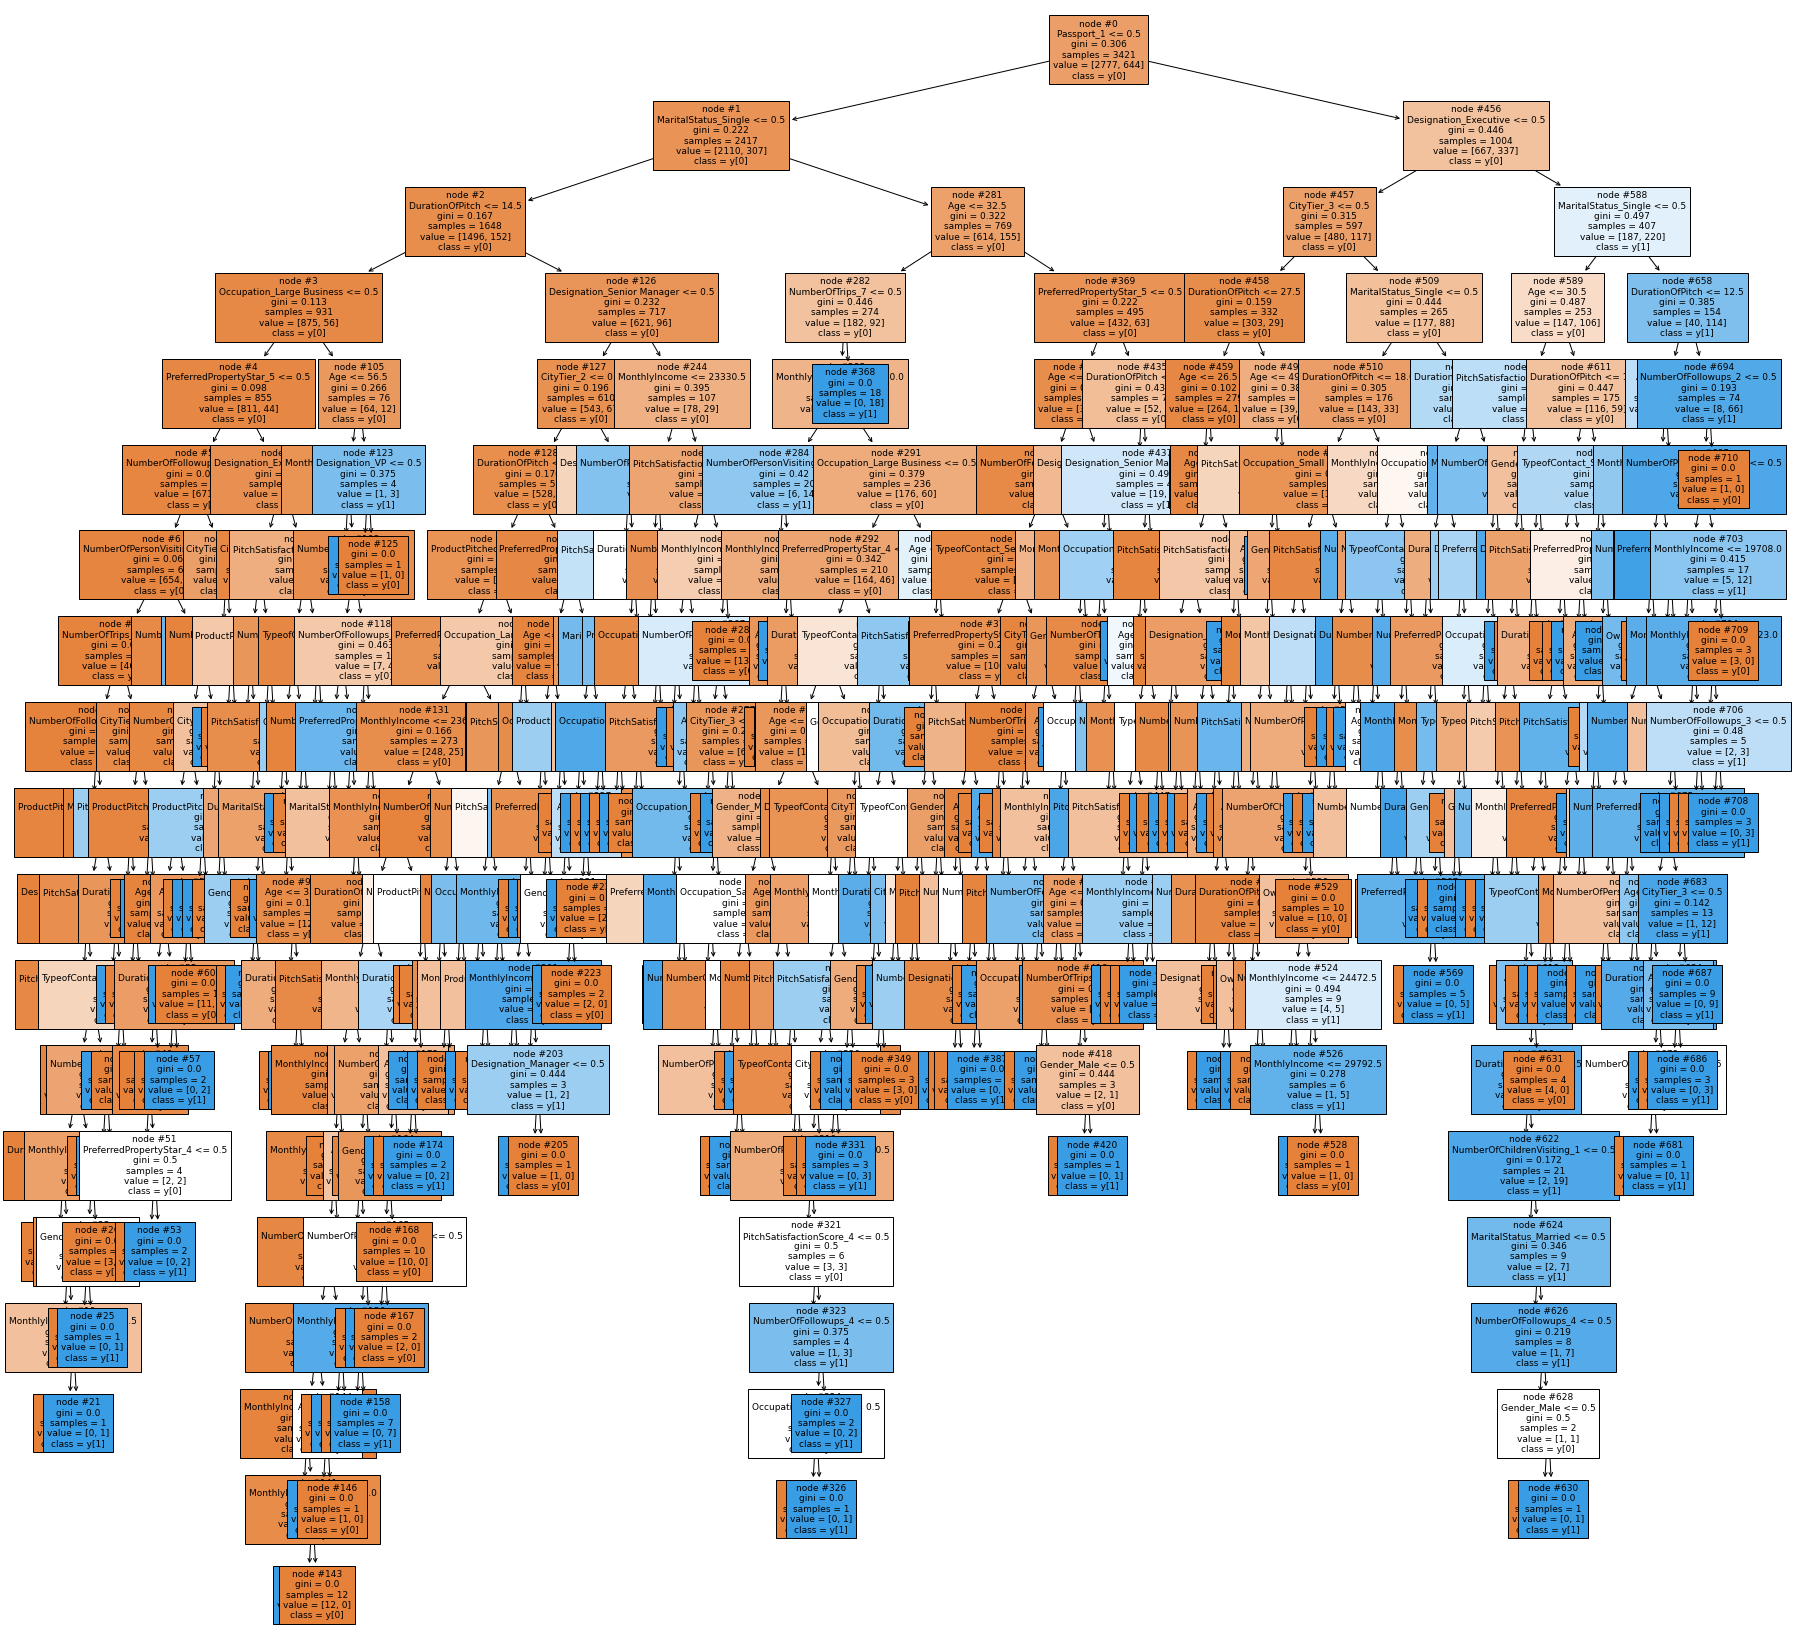

In [61]:
plt.figure(figsize=(30,30))
tree.plot_tree(d_tree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [62]:
# Text report showing the rules of a decision tree -

print(tree.export_text(d_tree,feature_names=feature_names,show_weights=True))

|--- Passport_1 <= 0.50
|   |--- MaritalStatus_Single <= 0.50
|   |   |--- DurationOfPitch <= 14.50
|   |   |   |--- Occupation_Large Business <= 0.50
|   |   |   |   |--- PreferredPropertyStar_5 <= 0.50
|   |   |   |   |   |--- NumberOfFollowups_6 <= 0.50
|   |   |   |   |   |   |--- NumberOfPersonVisiting_2 <= 0.50
|   |   |   |   |   |   |   |--- NumberOfTrips_7 <= 0.50
|   |   |   |   |   |   |   |   |--- NumberOfFollowups_4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [225.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- NumberOfFollowups_4 >  0.50
|   |   |   |   |   |   |   |   |   |--- ProductPitched_Super Deluxe <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Designation_Manager <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [114.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- Designation_Manager >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |-

#### HyperTuning the Decision tree.

In [63]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=5,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=10, random_state=1)

Accuracy on training set :  0.7576731949722303
Accuracy on test set :  0.7566462167689162
Recall on training set :  0.7298136645962733
Recall on test set :  0.7210144927536232
Precision on training set :  0.4177777777777778
Precision on test set :  0.4154488517745303
F1-Score on training set :  0.5313736574335783
F1-Score on test set :  0.5271523178807946


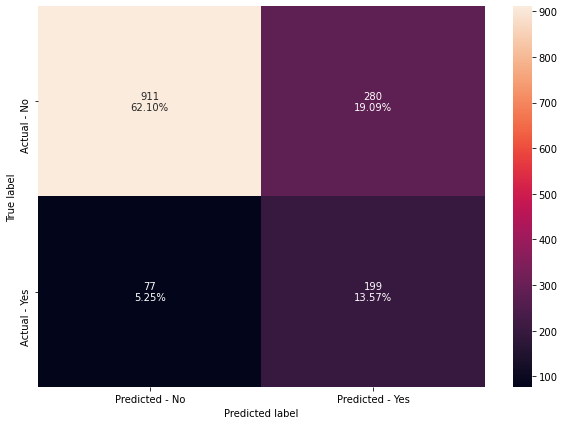

In [64]:
# get score 
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

- Overfitting reduced on training set. Recall scores on training Test sets are almost same.
- Other metrics score (precission, F1, Accuracy) reduced

#### Visualizing the decision tree after hypertuning.

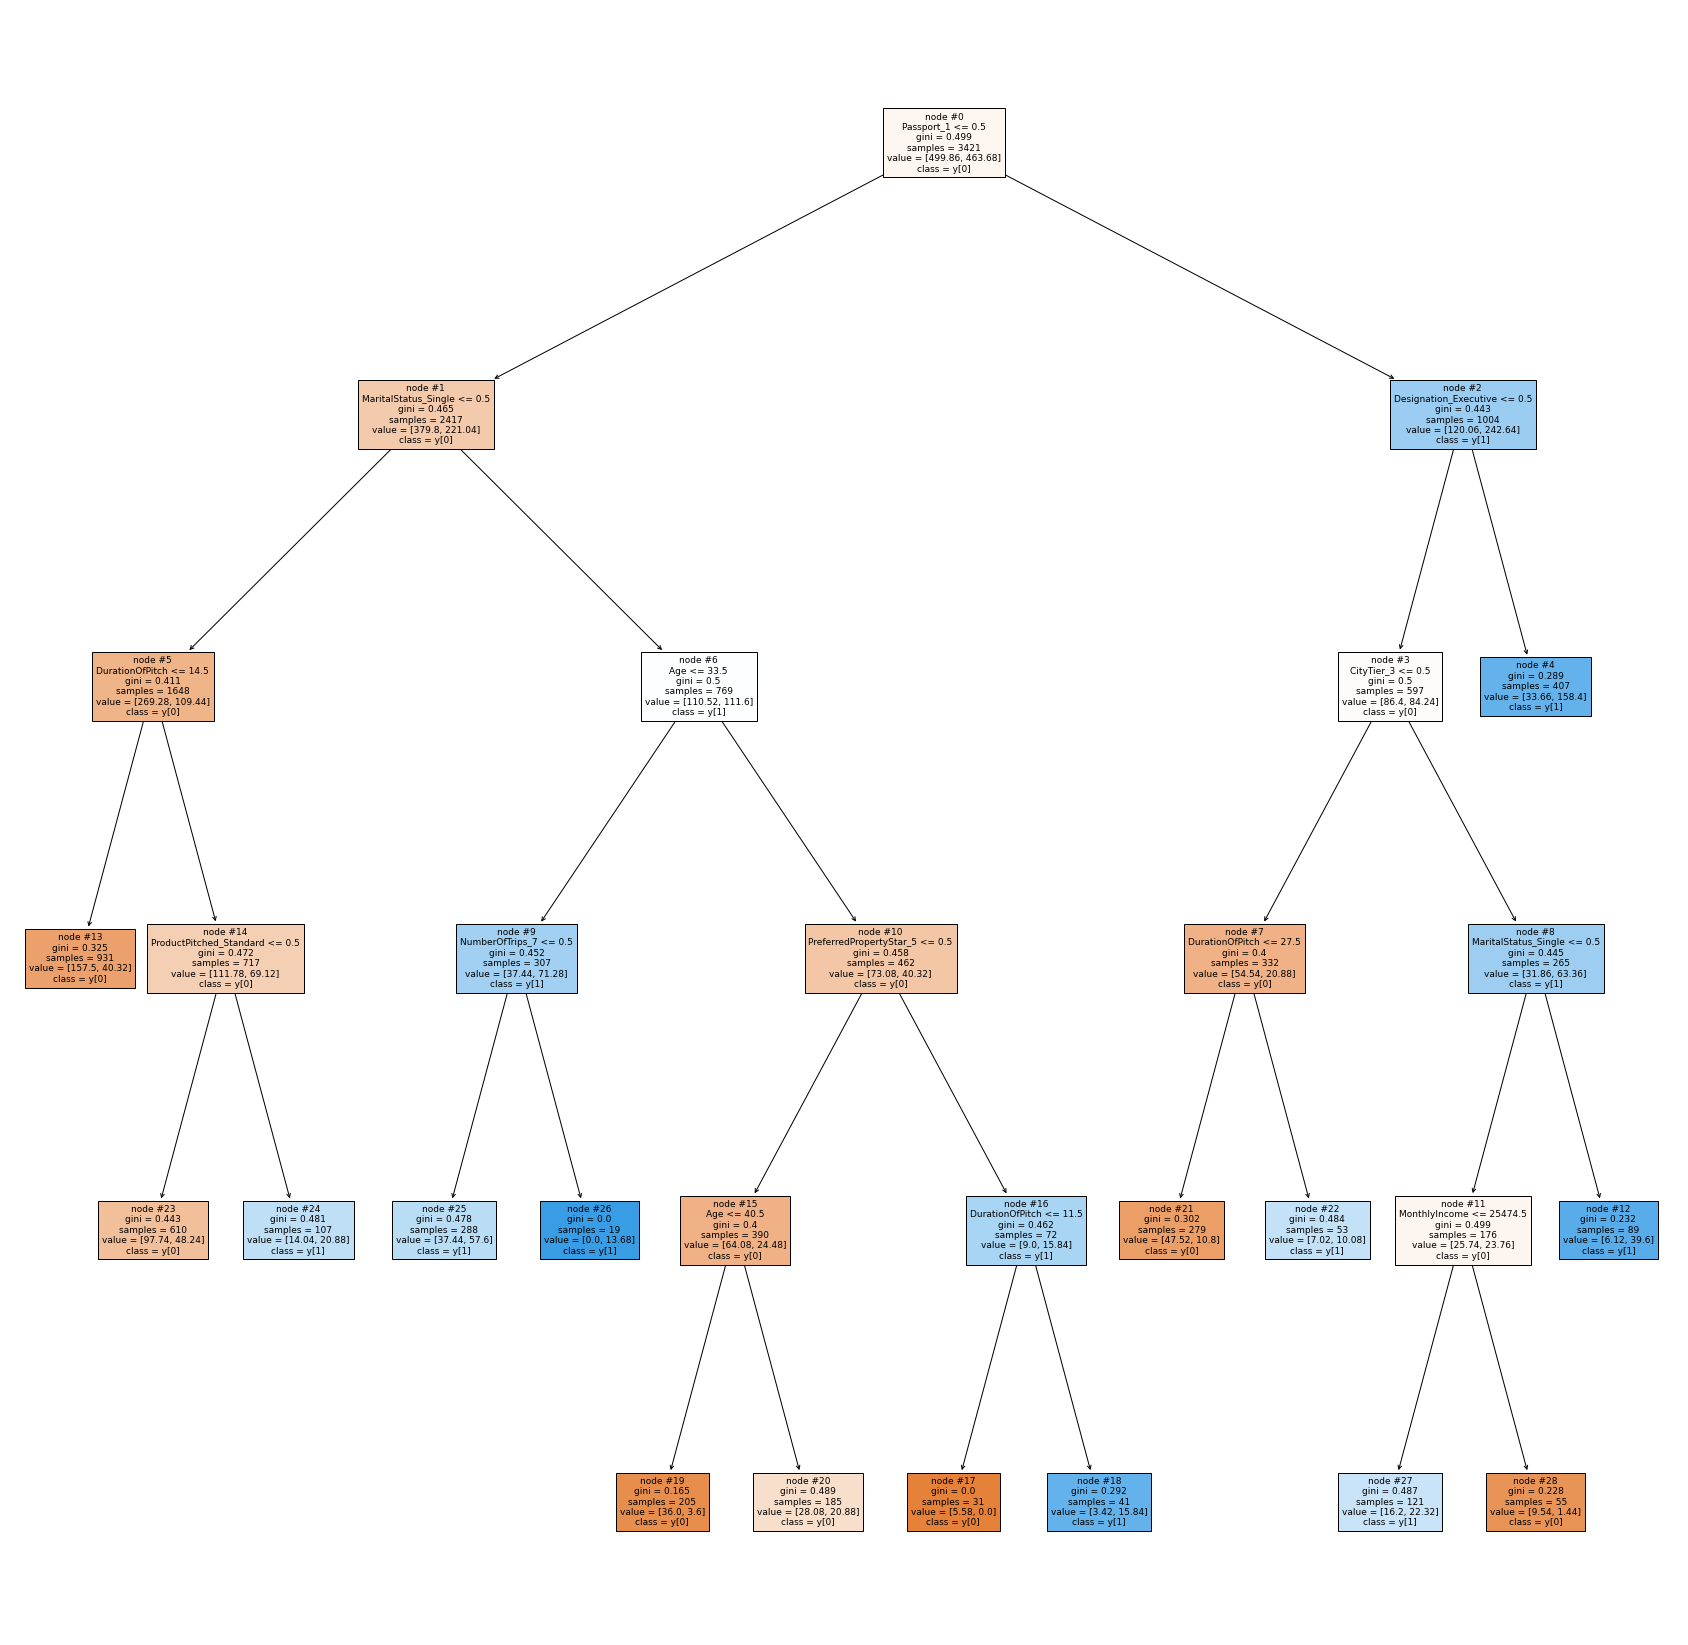

In [65]:
plt.figure(figsize=(30,30))
tree.plot_tree(dtree_estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

#### Random Forest Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.9004771642808452
Recall on training set :  1.0
Recall on test set :  0.5181159420289855
Precision on training set :  1.0
Precision on test set :  0.9166666666666666
F1-Score on training set :  1.0
F1-Score on test set :  0.662037037037037


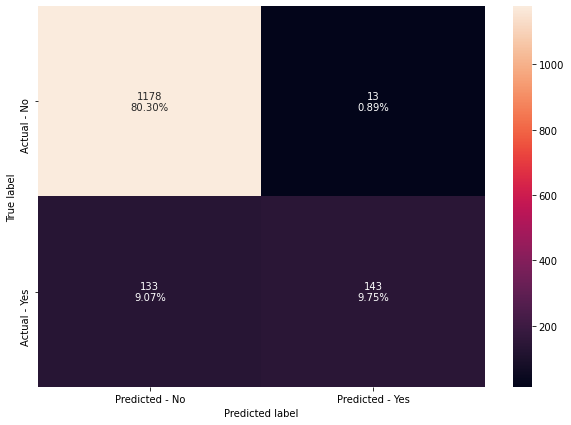

In [66]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

- From the metrics we can understand that Random forest model is overfitting on training set. And ~50% recall score on test set. Need to perform hypertuning on this model

#### HyperParameter tuning

In [67]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=5,
                       max_features='log2', min_samples_split=12,
                       n_estimators=30, oob_score=True, random_state=1)

Accuracy on training set :  0.7921660333235896
Accuracy on test set :  0.78186775732788
Recall on training set :  0.734472049689441
Recall on test set :  0.7427536231884058
Precision on training set :  0.46692991115498517
Precision on test set :  0.45154185022026433
F1-Score on training set :  0.5709112854556426
F1-Score on test set :  0.5616438356164384


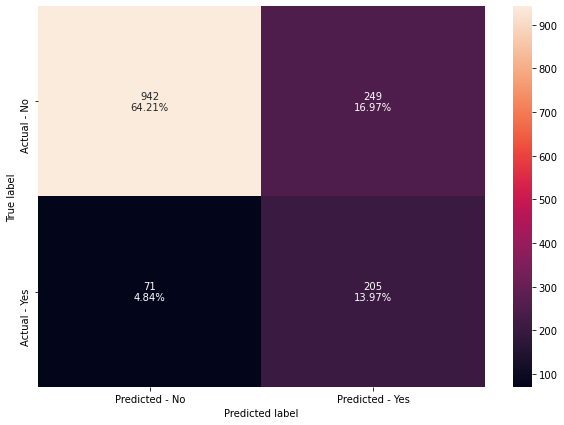

In [68]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

- Recall score increased compared to model without hyperparameter tuning. And over fitting reduced.

#### Bagging Calssifier

Accuracy on training set :  0.9947383805904706
Accuracy on test set :  0.9188820722563054
Recall on training set :  0.9720496894409938
Recall on test set :  0.6413043478260869
Precision on training set :  1.0
Precision on test set :  0.8984771573604061
F1-Score on training set :  0.9858267716535433
F1-Score on test set :  0.748414376321353


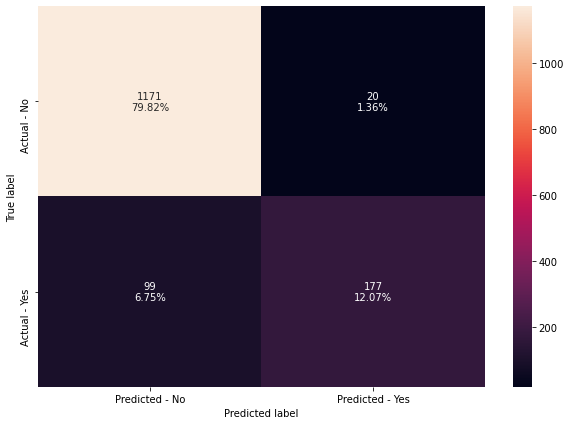

In [69]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

- Model is almost over fitting on training set.And there is lot of recall score difference on test set. Needed to perform hyperparameter tuning.

#### HyperParameter Tuning

In [70]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

Accuracy on training set :  1.0
Accuracy on test set :  0.9359236537150648
Recall on training set :  1.0
Recall on test set :  0.6956521739130435
Precision on training set :  1.0
Precision on test set :  0.9504950495049505
F1-Score on training set :  1.0
F1-Score on test set :  0.8033472803347279


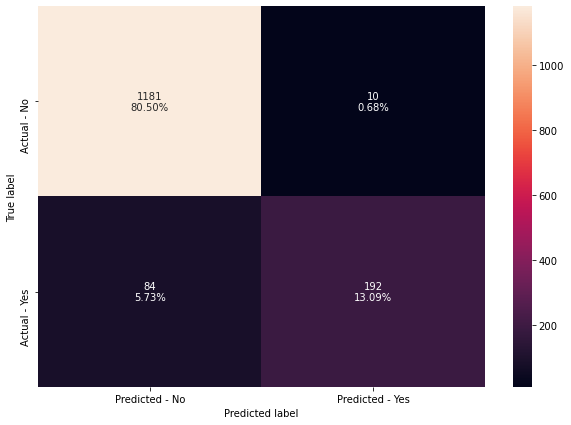

In [71]:
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

- Bagging classifier is still overfitting and recal score increased very little on test set.
- we need to try other techniques like boosting.

#### Ada Boosting

Accuracy on training set :  0.8447822274188833
Accuracy on test set :  0.8486707566462167
Recall on training set :  0.32142857142857145
Recall on test set :  0.34057971014492755
Precision on training set :  0.6877076411960132
Precision on test set :  0.7014925373134329
F1-Score on training set :  0.43809523809523815
F1-Score on test set :  0.4585365853658537


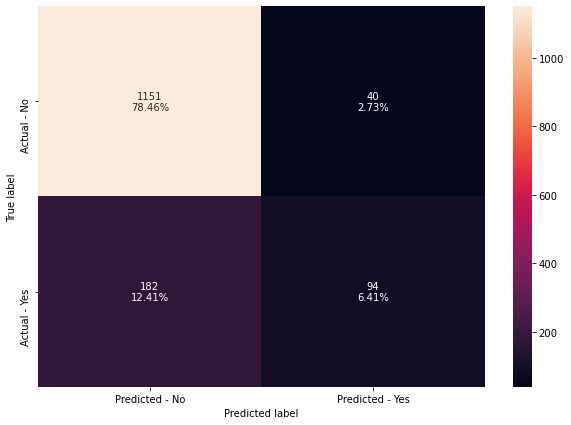

In [72]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

- Ada boosting gave very less recall score. need to perform hypertuning on this model

#### Hyperparameter tuning

In [73]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.9, n_estimators=100, random_state=1)

Accuracy on training set :  0.9850920783396667
Accuracy on test set :  0.8813905930470347
Recall on training set :  0.9316770186335404
Recall on test set :  0.6231884057971014
Precision on training set :  0.9884678747940692
Precision on test set :  0.7107438016528925
F1-Score on training set :  0.9592326139088728
F1-Score on test set :  0.6640926640926641


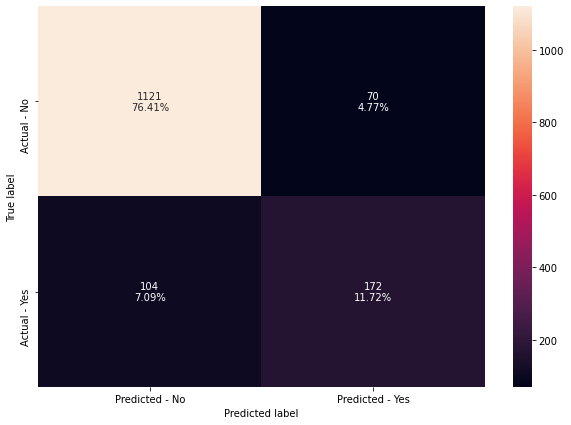

In [74]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

- recall score increased from ~30 to ~62 on test set. But its started overfitting on training set. 

#### Gradient Boosting

Accuracy on training set :  0.8886290558316282
Accuracy on test set :  0.8670756646216768
Recall on training set :  0.4658385093167702
Recall on test set :  0.38768115942028986
Precision on training set :  0.8902077151335311
Precision on test set :  0.8045112781954887
F1-Score on training set :  0.6116207951070336
F1-Score on test set :  0.5232273838630807


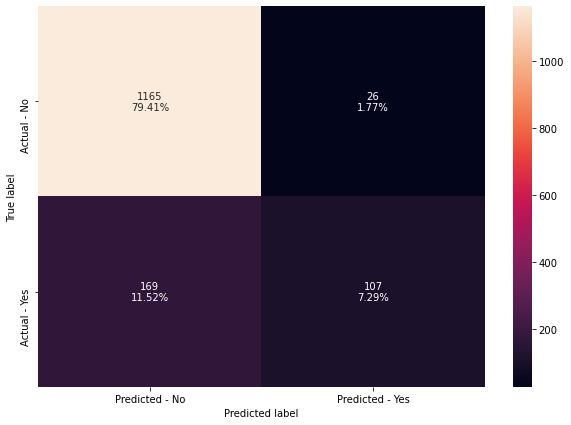

In [75]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

- Recall score is very less on training and test sets. Need hyperparameter tuning.

#### Hyperparameter Tuning

In [76]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=1)

Accuracy on training set :  0.9172756503946214
Accuracy on test set :  0.8861622358554874
Recall on training set :  0.6055900621118012
Recall on test set :  0.4927536231884058
Precision on training set :  0.9307875894988067
Precision on test set :  0.8343558282208589
F1-Score on training set :  0.7337723424270931
F1-Score on test set :  0.6195899772209567


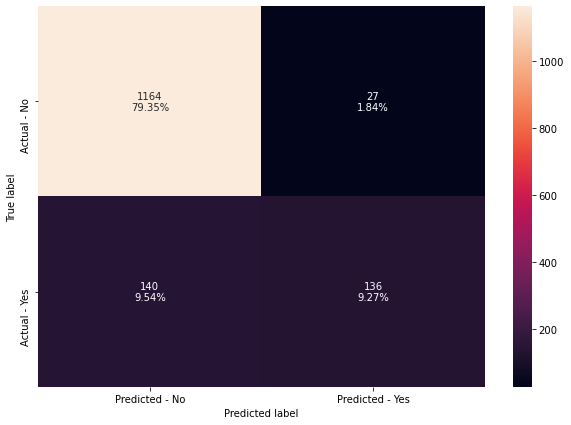

In [77]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

- Recall score increased to 60% from 40% but the score is still low on test set.

#### XGBoost Classifier

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9284253578732107
Recall on training set :  0.9968944099378882
Recall on test set :  0.7101449275362319
Precision on training set :  1.0
Precision on test set :  0.8868778280542986
F1-Score on training set :  0.9984447900466563
F1-Score on test set :  0.7887323943661971


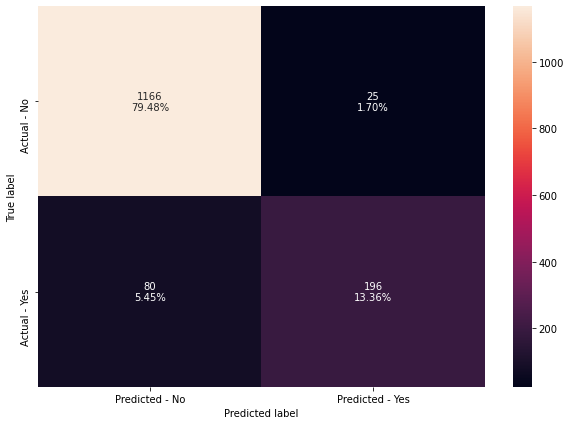

In [78]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

- XGboost model is overfitting on training set. Need to do hyperparameter tuning.

#### Hyperparameter tuning

In [79]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy on training set :  0.9763227126571178
Accuracy on test set :  0.9093387866394002
Recall on training set :  0.9968944099378882
Recall on test set :  0.8442028985507246
Precision on training set :  0.8904299583911235
Precision on test set :  0.7213622291021672
F1-Score on training set :  0.9406593406593408
F1-Score on test set :  0.7779632721202003


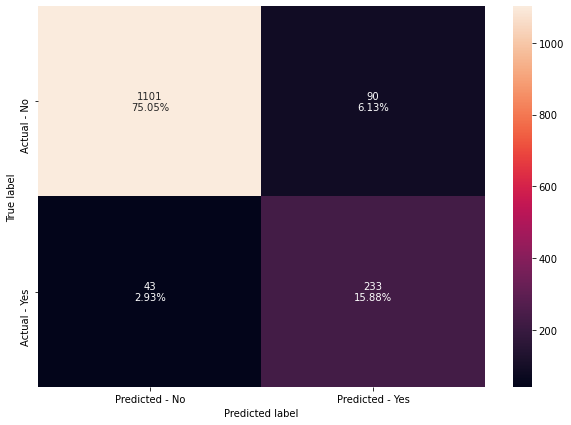

In [80]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

- Score improved slightly on test set. but still overfitting on training set.

#### Stacking Classifier

In [81]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=5,
                                                       max_features='log2',
                                                       min_samples_split=12,
                                                       n_estimators=30,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=250,
                                                  

Accuracy on training set :  0.8833674364220988
Accuracy on test set :  0.8459441036128152
Recall on training set :  0.8509316770186336
Recall on test set :  0.7463768115942029
Precision on training set :  0.6439482961222092
Precision on test set :  0.569060773480663
F1-Score on training set :  0.7331103678929767
F1-Score on test set :  0.6457680250783698


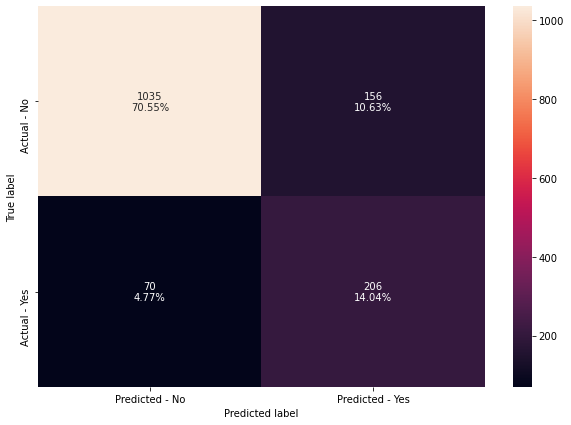

In [82]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

- Stacking is not overfitting compared to XGboosting. But XgBoost has better score on test set compared to Stacking. 

#### Compare all the models

In [83]:
# defining list of models
models = [d_tree, dtree_estimator,rf_estimator, rf_tuned, bagging_classifier,bagging_estimator_tuned,
          ab_classifier, abc_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [84]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
11,Tuned XGBoost Classifier,0.976323,0.909339,0.996894,0.844203,0.890430,0.721362,0.940659,0.777963
0,Decision Tree,1.000000,0.905249,1.000000,0.760870,1.000000,0.742049,1.000000,0.751342
12,Stacking Classifier,0.883367,0.845944,0.850932,0.746377,0.643948,0.569061,0.733110,0.645768
3,Tuned Random Forest,0.792166,0.781868,0.734472,0.742754,0.466930,0.451542,0.570911,0.561644
1,Tuned Decision Tree,0.757673,0.756646,0.729814,0.721014,0.417778,0.415449,0.531374,0.527152
10,XGBoost Classifier,0.999415,0.928425,0.996894,0.710145,1.000000,0.886878,0.998445,0.788732
5,Bagging Classifier Tuned,1.000000,0.935924,1.000000,0.695652,1.000000,0.950495,1.000000,0.803347
4,Bagging Classifier,0.994738,0.918882,0.972050,0.641304,1.000000,0.898477,0.985827,0.748414
7,Tuned AdaBoost Classifier,0.985092,0.881391,0.931677,0.623188,0.988468,0.710744,0.959233,0.664093
2,Random Forest,1.000000,0.900477,1.000000,0.518116,1.000000,0.916667,1.000000,0.662037


- Over all Tuned XGBoost & Decision tree are almost giving same score. But Decision tree is overfit compared to Tuned XgbBoost.
- Tuned XGBoost is giving highest Recall score. 

#### Feature Importance of Tuned XGBoost

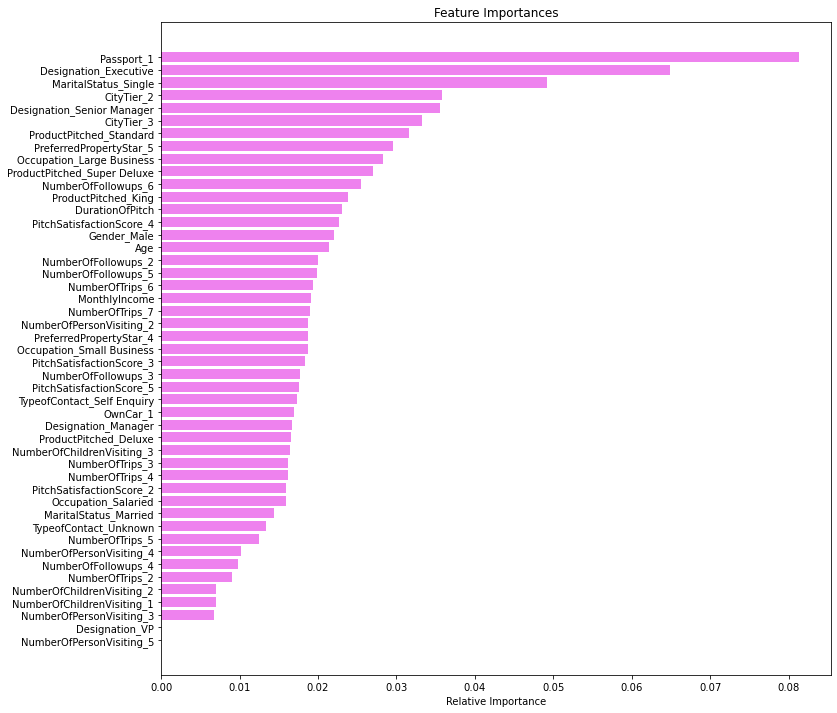

In [85]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##### From the above we can understand that Passport is the important feature in predicting customers whom would be most like to take the travel package

### Conclusion:

- From the above analysis we can say that following features are very important in predicting whether the customer takes travel package or not.
    - Passport
    - Designation
    - MaritalStatus
    - CityTier
    - ProductPitched
    - PreferredPropertyStar
    - Occupation
    - PitchSatisfactionScore
    - DurationOfThePitch
    - NumberOfFollowups
    - Gender
    - Age
    - NumberOfTrips
    - MonthlyIncome
- Company should target the customers who meet the following criteria:
    - Customers who has passport
    - Customers with designation Executive or senior Managers or Manager
    - Customers with marital status as single.
    - Customers who fall under CityTier 2 or 3
    - Average number of trips per year around six
    - Customers who has occupation as Large Business or Small Business
    - Customers who has considerable monthly income(not less than ~23k).
- Company should also focus on customer interaction. Following features would help in getting the customer.
    - Make sure the pitchSatisfactionScore is not less than 4.
    - PreferredPropertyStar at least 4
    - Type of Product pitched Standard or SuperDelux or King.
    - Number of followups minimum 6.
    
    